Autumn 2021 - Social Graphs and Interactions (02805) - DTU

# Import

In [66]:
import pandas as pd
import numpy as np
import math
import re 
import urllib.request
import json
import matplotlib.pyplot as plt
from fa2 import ForceAtlas2
import pickle
import gensim
from collections import Counter
from Contractions import contractions
from ast import literal_eval
from IPython.display import YouTubeVideo, HTML, display
from imblearn.over_sampling import SMOTE
from tqdm import tqdm

import nltk
from nltk import * 
from nltk.corpus import * 
from nltk.tokenize import RegexpTokenizer, WordPunctTokenizer, word_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier

import networkx as nx
from community import community_louvain
import networkx.algorithms.community as nx_comm
import seaborn as sns

import wordcloud
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import chart_studio
import chart_studio.plotly as py
import plotly.offline as pyo
import plotly.graph_objects as go
import plotly.express as px
from plotly.graph_objs.scatter.marker import Line
pyo.init_notebook_mode()
chart_studio.tools.set_credentials_file(username='mmestre', api_key='YbVYpQRqmw3RvNPohYBn')

import multiprocessing
from stellargraph.data import BiasedRandomWalk
from stellargraph import StellarGraph
cores = multiprocessing.cpu_count() # Count the number of cores in a computer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marcm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\marcm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Harry Potter and the Graph of Secrets - Final Project

## Table of Contents

* [1. Motivation](#c1)

* [2. Basic Statistics](#c2)
    * [2.1 Data Preparation](#s3_1)
    * [2.2 Data and Basic Statistics](#s3_2)
    * [2.3 Visualization](#s3_3)
* [3. Tools, theory and analysis](#c3)
    * [3.1 Project 1: WordCloud analysis of houses](#s3_1)
    * [3.2 Project 2:...](#s3_2)
    * [3.3 Project 3: Sentiment Analysis](#s3_3)
    * [3.4 Project 4:...](#s3_4)
    * [3.5 Project 5:...](#s3_5)
    * [3.6 Project 6:...](#s3_6)

* [4. Discussion](#c4)

* [5. Contributions](#c5)

* [6. References](#c6)

## 1. Motivation  <a class="anchor" id="c1"></a>

Choosing the main topic for our final project was not easy, as the internet is full of fandoms and there are millions of pages we could have turned to. But all three members of this wonderful team felt the same when we thought of Harry Potter. We reminisce about those fantasy films we grew up with and dreamt about so many times. All of us agreed that Harry Potter had influenced our childhood and adolescence in a way that was as special as few other book and film sagas.

This project makes it clear that motivation towards a task completely changes the perspective with which the task is approached. In our case, and from the first day we decided to tackle this topic, we felt the magic of the Harry Potter world welling up inside us and turned us into frenzied fans of the magical world at the mercy of networks and graphs. The opportunity we had before us to venture into the secrets of the connection between characters, between the houses of Hogwarts, or even the development of the feelings of the most important characters throughout the saga... Simply thrilling!

Our most arduous task is to lead the audience, namely you, along this path in which enormous amounts of information are revealed and to keep the mystery and excitement of further reading. We have tried to make this adventurous journey through data analysis that combines the world of knowledge with the magic of JKRowling's pen as bearable as possible. So, without further ado, welcome to Harry Potter and the Graph of Secrets.

## 2. Basic Statistics <a class="anchor" id="c2"></a>

The data used and needed for the analysis has been extracted and prepared for this project, and it is detailed below:
* **Main data source:** https://harrypotter.fandom.com/wiki/Main_Page
> The main site where we extracted information from is the fandom page of harry potter. Our first steps in this project would not have made sense without access to all the information provided to us by the Harry Potter fandom page. We have been able to create the most important datasets of the project with the information of each character of the saga from there and it has served as a fundamental support for the development of the project.
>
>The images used in all the wordclouds to link the excerpts to each of the houses have also been extracted from fandom, but in this case from pottermore fandom. We used those as they have the predominant colour of the house very prominent and have less detail than the original Hogwarts crest.
* **Harry Potter Scripts:** https://www.kaggle.com/kornflex/harry-potter-movies-dataset/version/15
> In order to be able to carry out all the analyses we set ourselves as a goal from the beginning, we needed to somehow obtain all the dialogues/conversations of the characters of the entire Harry Potter saga. We started by taking the script of the first film and tried to refine it by assigning each sentence to a character, but it was a somewhat complicated task that could lead to possible errors.
>
> We then expanded our search and found the link to the kaggle dataset shown above. In the file we can find in addition to the characteristics of each of the films such as the budget, the cast of actors and so on, each and every one of the phrases of the film with the relevant character.
>
>Consequently, this dataset has allowed us to carry out all the analyses related to the study of emotions throughout the films.
* **Text emotion extract from Twitter:** https://www.kaggle.com/icw123/emotion
> Finally, we have used the "Text emotion" dataset which can be found in the link above. The dataset is composed of 40000 tweets, each one being assigned 1 out of 13 different emotions. These are the main emotions/sentiments that stand out in each of the tweets.
>
> The technique used in our project in relation to this dataset is transfer learning. In this way, we can learn from the dataset and transfer the knowledge to the dialogue/sentences of each of the characters in the film. To learn more about it go to the section [3.5](#s3_5).

### 2.1 Data Preparation <a class="anchor" id="s_2_1"></a>

First of all, we started with a study of the Harry Potter wiki page, looked at how we could extract information and brainstormed possible ideas for the scope of our final project. We decided to begin by extracting information on as many characters as possible and, to commence with, categorising them by their Hogwarts houses: 
> * Gryffindor
> * Ravenclaw
> * Hufflepuff
> * Slytherin
> * Unknown_House

Eventually, we added a fifth cathegory called _"Unknown_House"_ as some of the characters are not members of a house. The list of houses is then created so we can iterate on each house and extract each list of members.

<table><tr><td><p align='right' style='padding: 10px'>
             <img alt='Gryffindor' src='house_images/Gryffindor.png' width='200'><br><em style='color: grey'>Gryffindor</em></p></td>
             <td><p align='right' style='padding: 10px'>
             <img alt='Ravenclaw' src='house_images/Ravenclaw.png' width='200'><br><em style='color: grey'>Ravenclaw</em></p></td>
             <td><p align='right' style='padding: 10px'>
             <img alt='Hufflepuff' src='house_images/Hufflepuff.png' width='200'><br><em style='color: grey'>Hufflepuff</em></p></td>
             <td><p align='right' style='padding: 10px'>
             <img alt='Slytherin' src='house_images/Slytherin.png' width='200'><br><em style='color: grey'>Slytherin</em></p></td>
            

In [37]:
list_of_cath =['Category:Unknown_House',
'Category:Ravenclaws',
'Category:Gryffindors',
'Category:Slytherins' ,
'Category:Hufflepuffs']

dict_house={}
for cat in list_of_cath:
    list_of_members=[]
    
    baseurl = "https://harrypotter.fandom.com/api.php?"
    action = "action=query"
    cmtitle = "cmtitle="+cat
    content = "list=categorymembers&cmlimit=max"
    dataformat ="format=json"
    
    query = "{}{}&{}&{}&{}".format(baseurl, action, content, cmtitle, dataformat)
    print(query)
    
    wikiresponse = urllib.request.urlopen(query)
    wikidata = wikiresponse.read()
    wikitext = wikidata.decode('utf-8')
    description = json.loads(wikitext)  
    for dict_ in description['query']['categorymembers']:
        if ('Template:' in dict_['title']) or ('Category:' in dict_['title']) \
        or ('Unidentified' in dict_['title']):
            pass
        else:
            list_of_members.append(dict_['title'])
    dict_house[cat]=list_of_members

https://harrypotter.fandom.com/api.php?action=query&list=categorymembers&cmlimit=max&cmtitle=Category:Unknown_House&format=json
https://harrypotter.fandom.com/api.php?action=query&list=categorymembers&cmlimit=max&cmtitle=Category:Ravenclaws&format=json
https://harrypotter.fandom.com/api.php?action=query&list=categorymembers&cmlimit=max&cmtitle=Category:Gryffindors&format=json
https://harrypotter.fandom.com/api.php?action=query&list=categorymembers&cmlimit=max&cmtitle=Category:Slytherins&format=json
https://harrypotter.fandom.com/api.php?action=query&list=categorymembers&cmlimit=max&cmtitle=Category:Hufflepuffs&format=json


Once the information has been exctracted, a dataframe is created linking each of the characters to their respective houses.

In [ ]:
all_house =[]
for col in sorted(list_of_cath): 
    df = pd.DataFrame(dict_house[col])
    df['House']=col[9:]
    df.columns=['Name','House']
    all_house.append(df)
df = pd.concat(all_house).reset_index(drop=True)
df

In order to proceed with the analysis, a file containing all the useful information extracted from the Harry Potter wiki is made. Then, all the files are stored in the folder `Description`, for a later use in the project.

In [ ]:
for name in list(df.Name):
    baseurl = "https://harrypotter.fandom.com/api.php?"
    action = "action=query"
    title = "titles="+urllib.parse.quote_plus(name)
    content = "prop=revisions&rvprop=content&rvslots=*"
    dataformat ="format=json"
    
    query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)

    wikiresponse = urllib.request.urlopen(query)
    wikidata = wikiresponse.read()
    wikitext = wikidata.decode('utf-8')
    description = json.loads(wikitext)  
    page_number=list(description['query']['pages'].keys())[0]
    text_to_paste= description['query']['pages'][page_number]['revisions'][0]['slots']['main']['*']
    
    #SECOND STEP: SAVE RESULT IN A FOLDER
   # with open("Description\{}.txt".format(name), "w") as text_file:
   #     json.dump(text_to_paste,text_file)
   # print(name)

Similarly to the previous step, a new folder is created named `Description_extract` where the files of all the characters are created and stored, these containing the descriptive text for each of them. In order to achieve that and get the "clean" version of each character description, we had to carefully analyse, detect  and eliminate each of the patterns effectively. When dealing with this task we encountered a huge amount of different patterns we had to look for and carefully remove to leave the relevant information intact for us. These are some examples:

* `==\n\n\n=== Family lineage ===\n \t \t`
* `\n\n\n===== History of Magic =====\n\n \t`
* `Dumbledore\u2019s`
* `n\n\n==== Harry's \"death\" ====\n`
* `\n\n\n=== Career as an Auror (2007\u20132016) ===\n\n`

...and much more.

As it can be seen, there was much to take into consideration when dealing with the cleaning of the text, not only with different forms of holding the text but also unicode and special characters. The final version of the main patterns used can be seen below:

```python
pattern_1 ='(=+[\w\s\–\(\)\'^\w\/\"\,\.\w\-\w]+=+)'
pattern_2 ='(=+(?:[\w\s]+=+\s)+[\w\s]+=+)'
```


In [ ]:
for name in list(df.Name):
    baseurl = "https://harrypotter.fandom.com/api.php?"
    action = "action=query"
    title = f"titles="+urllib.parse.quote_plus(name)
    content = "prop=extracts&exlimit=1&explaintext"
    dataformat ="format=json"
    
    query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
    
    wikiresponse = urllib.request.urlopen(query)
    wikidata = wikiresponse.read()
    wikitext = wikidata.decode('utf-8')
    description = json.loads(wikitext)
    page_number = list(description['query']['pages'].keys())[0]
    text_to_paste=description['query']['pages'][page_number]['extract']
    list_to_remove=["== Notes and references ==","== External links ==",'\n','\t']
    
    #FIRST STEP FIND TITLE WITH REG EXPRESS
    pattern_1 ='(=+[\w\s\–\(\)\'^\w\/\"\,\.\w\-\w]+=+)'
    pattern_2 ='(=+(?:[\w\s]+=+\s)+[\w\s]+=+)'
    list_to_remove = re.findall(pattern_1,text_to_paste)+re.findall(pattern_2,text_to_paste)
    list_to_remove.append('\t')
    list_to_remove.append('\n')
    for element in list_to_remove:
        text_to_paste=text_to_paste.replace(element,"")
    
    pattern_replace = '(\s\s+)'
    list_to_replace = re.findall(pattern_replace,text_to_paste)
    for element in list_to_replace:
        text_to_paste=text_to_paste.replace(element," ")
        
    # Here we are just removing the unicode characters from the text
    text_to_paste = text_to_paste.encode('unicode_escape').decode('ascii')
    text_to_paste = re.sub(r'\\u(.){4}', '', text_to_paste)
    
    #SECOND STEP: SAVE RESULT IN A FOLDER
   # with open("Description_extract\{}.txt".format(name), "w") as text_file:
   #      json.dump(text_to_paste,text_file)
   # print(name)

In order to cleanorganisational characters that leaked through and only keep relevant characters, we clean or df as following:

In [ ]:
page_path = "Description/"

list_to_remove=[]
list_to_keep=[]
for name in df.Name:

    with open(page_path+name+'.txt','r') as f:
        node_description= f.read()
    node_description
    pattern_to_erase=r'(Organisation infobox)'
    pattern_to_keep=r'(Individual infobox)'
    if len(re.findall(pattern_to_erase,node_description))>0:
        list_to_remove.append(name)
    if len(re.findall(pattern_to_keep,node_description))>0:
        list_to_keep.append(name)

df = df[df['Name'].isin(list_to_keep)]

The function `find_cat` is created in order to detect in an easy and effective way the category.

In [ ]:
def find_cat(wikitext,reg):
    value = re.findall(reg, wikitext)
    if len(value) > 0:
        return value[0]
    else:
        return "Unknown"

From each of the files for each Harry Potter character that we have saved in the folder `Description`, we still have plenty of information to gather like gender, blood type (considering if it is a descendant from a muggle family or not), nationality, height, weight, and much more. To do that, the function `get_all_attributs` is created below.


In [ ]:
def get_all_attributs(name,page_path = "Description/"):
    with open(page_path+name+'.txt','r') as f:
        node_description= f.read()

    #gender
    reg_gender = r"gender = ([\w \-]+)"
    item= re.findall(reg_gender,node_description)
    if len(item)>0:
        gender=item[0]
    else:
        gender='Unknown'
    
    #blood
    reg_blood = r"blood = \[\[([\w\- ]+)\]\]"
    item= re.findall(reg_blood,node_description)
    if len(item)>0:
        blood=item[0]
    else:
        blood='Unknown'
    
    #species
    reg_species= r"species = \[\[([\w \-]+)\]\]"
    item = re.findall(reg_species,node_description)
    if len(item)>0:
        species=item[0]
    else:
        species='Unknown'
    
    #nationality
    reg_nationality_1=r"nationality = \[\[([\w\| \-]+)\]\]"
    reg_nationality_1_bis=r'nationality = \[\[(.*?)(?:\|.*?)?\]\]'
    reg_nationality_2=r"nationality = \{\{([\w\| \-]+)\}\}"

    item= re.findall(reg_nationality_1_bis,node_description)+ re.findall(reg_nationality_2,node_description)  
    if len(item)>0:
        nationality=item[0]
    else:
        nationality='Unknown'
    
    #heigh
    reg_height= r"height = ([\w\s\-\']+)"
    item = re.findall(reg_height,node_description)
    if len(item)>0:
        heigh=item[0]
    else:
        heigh='Unknown'    
    
    #weight
    reg_weight=r"weight = ([\w\s\-]+)"
    item = re.findall(reg_weight,node_description)
    if len(item)>0:
        weight=item[0]
    else:
        weight='Unknown'
        
    #hair
    reg_hair=r"hair = ([\w \-]+)"
    item =re.findall(reg_hair,node_description)
    if len(item)>0:
        hair=item[0]
    else:
        hair='Unknown'
        
    #eyes
    reg_eyes=r"eyes = ([\w \-]+)"
    item =re.findall(reg_eyes,node_description)
    if len(item)>0:
        eyes=item[0]
    else:
        eyes='Unknown'
        
    #skin    
    reg_skin=r"skin = ([\w \-]+)"
    item =re.findall(reg_skin,node_description)
    if len(item)>0:
        skin=item[0]
    else:
        skin='Unknown'
        
    #caracters_in_page
    new_reg_link = r'\[\[(.*?)(?:\|.*?)?\]\]'
    caracters_in_page=[]
    linked_names_quick= re.findall(new_reg_link,node_description)
    for element in set(linked_names_quick):
        if element in list(df.Name):
            caracters_in_page.append(element)
    return [gender,blood,species,nationality,heigh,weight,hair,eyes,skin,caracters_in_page]

As an example, here are the attributes we obtain from the Ronald Weasley file:

In [ ]:
get_all_attributs('Ronald Weasley')

Finally, we use the `get_all_atributs` function to, in fact, get all the attributes of the characters and practically store add them as new columns of information in the dataframe so we are able to sort and use the relevant information we filtered.

In [107]:
gender_link=[]
blood_link=[]
species_link=[]
nationality_link=[]
heigh_link=[]
weight_link=[]
hair_link=[]
eyes_link=[]
skin_link=[]
caracters_in_page_link=[]

for name in list(df['Name']):
    attribut = get_all_attributs(name)
    gender_link.append(attribut[0])
    blood_link.append(attribut[1])
    species_link.append(attribut[2])
    nationality_link.append(attribut[3])
    heigh_link.append(attribut[4])
    weight_link.append(attribut[5])
    hair_link.append(attribut[6])
    eyes_link.append(attribut[7])
    skin_link.append(attribut[8])
    caracters_in_page_link.append(attribut[9])
        
df['Gender']=gender_link
df['Blood']=blood_link
df['Species']=species_link
df['Nationality']=nationality_link
df['Heigh']=heigh_link
df['Weight']=weight_link
df['Hair']=hair_link
df['Eyes']=eyes_link
df['Skin']=skin_link
df['Caracters_in_page']=caracters_in_page_link
df['House'].replace('Unknown_House', 'Unknown',inplace=True)
df.describe()

As this process we just went through is quite tedious but specially time consuming, we store the final dataset so that we do not have to re-run the code each time we open the notebook again and again. This way, we just create the file `pickle_network_prep.txt`, store it, and just load it when we go back to the code!

In [67]:
# # For storing
# with open(r"pickle_network_prep.txt", "wb") as fp:   #Pickling
#     pickle.dump(df_all, fp)

# # For loading
with open(r"pickle_network_prep.txt", "rb") as fp:   # Unpickling
    df_all = pickle.load(fp)

# df_all.describe()

It is time to create generate our first gfraph of this network. Each node will have several features, all related with the character it corresponds to.

In [68]:
G = nx.DiGraph()
for index, row in df_all.iterrows():
    G.add_node(row['Name'], House=row['House'], Gender=row['Gender'],Blood=row['Blood'],Species=row['Species'] \
                          , Nationality=row['Nationality'], Heigh=row['Heigh'],Weight=row['Weight'],Eyes=row['Eyes'] \
                          ,Skin=row['Skin'])
for index, row in df_all.iterrows():
    for element in row['Caracters_in_page']:
        #REMOVE SELF LOOP
        if element !=row['Name']:
            G.add_edge(row['Name'],element)

Now that we have generated the graph `G`, we want to remove those nodes with a degree equal to zero as they are not relevant for our analysis (_a total of 315 nodes_). After removing those nodes from our graph, we proceed to remove the characters as well from our Dataframe. Therefore, we are left with just the characters that matter for our study.

In [69]:
#Nodes with zero degree
remove = [node for node,degree in dict(G.degree()).items() if degree==0]

print('nb nodes to remove',len(remove))

#Remove those nodes from the graph

G.remove_nodes_from(remove)

#Remove thoses nodes from the Dataframe
df_all.drop(df_all[df_all.Name.isin(remove)].index,inplace=True)

nb nodes to remove 0


In this part, as we did during the exercices at class, we decided to consider only the GCC of the graph G. We also reduce the DataBase created with only the names of the characters in the GCC.

In [70]:
largest_cc = max(nx.weakly_connected_components(G), key=len)
GCC = G.subgraph(largest_cc)

# Creation of the dataframe that will contain only the GCC.
mask = df_all.Name.apply(lambda x: any(item for item in list(GCC.nodes()) if item in x))
df = df_all[mask]

### 2.2 Data and Basic Statistics <a class="anchor" id="s_2_2"></a>

We start by looking at the size of the network we are dealing with:

In [71]:
print(f"Number of nodes in the network: {len(list(GCC.nodes))}" )
print(f"Number of links in the network: {len(list(GCC.edges))}" )

Number of nodes in the network: 511
Number of links in the network: 5446


The most connected characters are detailed below, from an in, out and all degree perspective. The names shown were expected as they are some of the most famous characters.

In [72]:
degrees_in = np.array([GCC.in_degree(n) for n in GCC.nodes()])
degrees_out = np.array([GCC.out_degree(n) for n in GCC.nodes()])
all_degree = np.array([GCC.degree(n) for n in GCC.nodes()])

df_degree= df.copy()
df_degree['in_degree']=degrees_in
df_degree['out_degree']=degrees_out
df_degree['all_degree']=all_degree

print('Top connected characters in Harry Potter by all degrees')
print(df_degree.sort_values(by='all_degree',ascending=False)[['Name','all_degree']][:5])
print('______________________________________')
print('Top connected characters in Harry Potter by in degrees')
print(df_degree.sort_values(by='in_degree',ascending=False)[['Name','in_degree']][:5])
print('______________________________________')
print('Top connected characters in Harry Potter by out degrees')
print(df_degree.sort_values(by='out_degree',ascending=False)[['Name','out_degree']][:5])

Top connected characters in Harry Potter by all degrees
                 Name  all_degree
165      Harry Potter         371
52   Albus Dumbledore         222
667        Tom Riddle         218
220    Ronald Weasley         211
71   Hermione Granger         201
______________________________________
Top connected characters in Harry Potter by in degrees
                 Name  in_degree
165      Harry Potter        277
667        Tom Riddle        154
52   Albus Dumbledore        129
220    Ronald Weasley        128
71   Hermione Granger        123
______________________________________
Top connected characters in Harry Potter by out degrees
                 Name  out_degree
165      Harry Potter          94
52   Albus Dumbledore          93
220    Ronald Weasley          83
792   Jacob's sibling          81
71   Hermione Granger          78


Intriguing, but who are really the characters with most connections from each of the 4 houses of Hogwarts? We find the answer here:

* **Gryffindor**

In [73]:
df_house_degree=df_degree.loc[df_degree['House']=='Gryffindors']

print('Top connected characters in Gryffindor by out degrees')
print(df_house_degree.sort_values(by='all_degree',ascending=False)[['Name','all_degree']].head())

Top connected characters in Gryffindor by out degrees
                   Name  all_degree
165        Harry Potter         371
52     Albus Dumbledore         222
220      Ronald Weasley         211
71     Hermione Granger         201
125  Minerva McGonagall         174


* **Hufflepuff**

In [74]:
df_house_degree=df_degree.loc[df_degree['House']=='Hufflepuffs']

print('Top connected characters in Hufflepuff by out degrees')
print(df_house_degree.sort_values(by='all_degree',ascending=False)[['Name','all_degree']].head())

Top connected characters in Hufflepuff by out degrees
                 Name  all_degree
359  Nymphadora Tonks         105
256    Cedric Diggory          98
342     Pomona Sprout          72
239       Susan Bones          64
231     Hannah Abbott          64


* **Ravenclaw**

In [75]:
df_house_degree=df_degree.loc[df_degree['House']=='Ravenclaws']

print('Top connected characters in Ravenclaw by out degrees')
print(df_house_degree.sort_values(by='all_degree',ascending=False)[['Name','all_degree']].head())

Top connected characters in Ravenclaw by out degrees
                  Name  all_degree
461      Luna Lovegood         111
426    Filius Flitwick          90
460  Gilderoy Lockhart          72
401          Cho Chang          71
503   Sybill Trelawney          54


* **Slytherin**

In [76]:
df_house_degree=df_degree.loc[df_degree['House']=='Slytherins']

print('Top connected characters in Slytherin by out degrees')
print(df_house_degree.sort_values(by='all_degree',ascending=False)[['Name','all_degree']].head())

Top connected characters in Slytherin by out degrees
                 Name  all_degree
667        Tom Riddle         218
687     Severus Snape         192
621      Draco Malfoy         167
706  Dolores Umbridge         137
682   Horace Slughorn         121


Now that we have had an overview of the characters and their degrees, we now plot the degree disrtribution of the graph to get a better grasp and overview of the network we approach.

In [77]:
# Plot function for degree distributions
def plot_degree_dist(degs, title):
    k_min = np.min(degs)
    k_max = np.max(degs)
    print(f"k_min: {min(degs)}, k_max: {max(degs)}")
    bin_vector = np.arange(k_min,k_max+2)
    count, bins = np.histogram(degs, bins=bin_vector)
    f, (plt1, plt2) = plt.subplots(1,2, figsize=(16,5))  

    # Hist plot
    plt1.bar(bins[:len(bins)-1], count)
    plt1.set_title("Histogram of the degree distrubution " + title)   
    plt1.set(xlabel = 'Degree', ylabel = 'Number of nodes')

    # Log plot
    plt2.scatter(bins[:len(bins)-1], count)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(1,1000)
    plt.ylim(1,1000)
    plt2.set_title("Degree distrubution in Log-Log scale " + title)  
    plt2.set(xlabel = 'Degree', ylabel = 'Number of nodes')

k_min: 0, k_max: 277


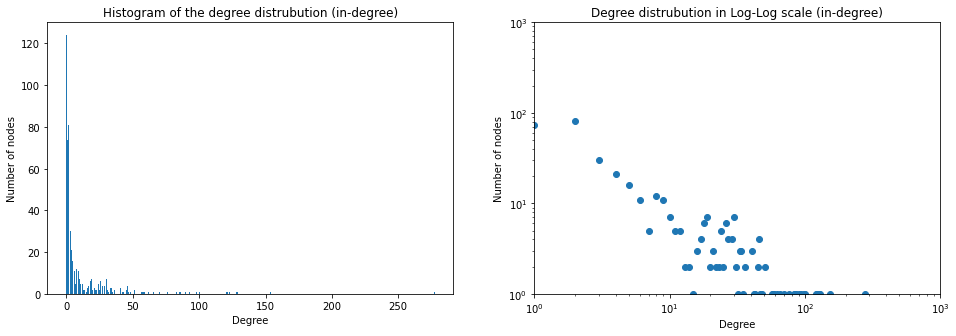

In [78]:
degs_in = [(v) for (e,v) in GCC.in_degree]
plot_degree_dist(degs_in, "(in-degree)")

k_min: 0, k_max: 94


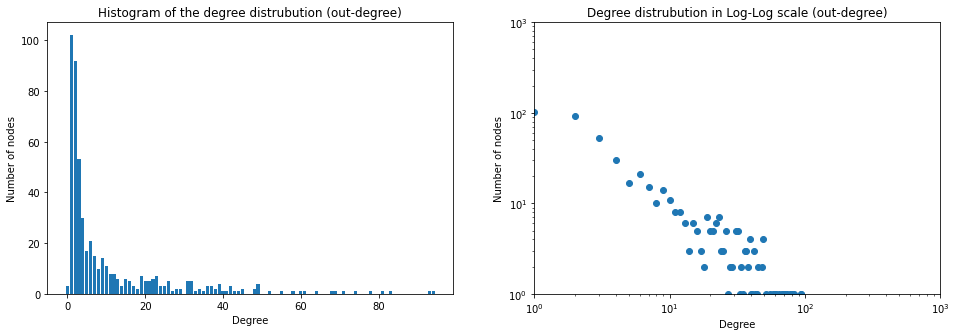

In [79]:
degs_out = [(v) for (e,v) in GCC.out_degree]
plot_degree_dist(degs_out, "(out-degree)")

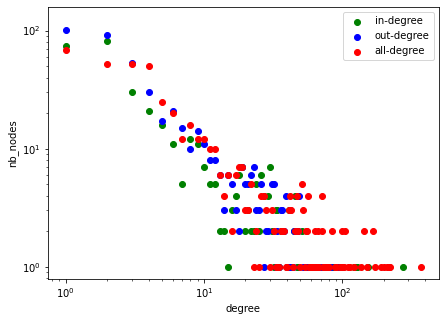

In [80]:
w_in = Counter(degrees_in)
w_out= Counter(degrees_out)
w= Counter(all_degree)
plt.figure(figsize=(7, 5)) 

plt.scatter(list(w_in.keys()), list(w_in.values()),color='g', label='in-degree')
plt.scatter(list(w_out.keys()), list(w_out.values()),color='b', label='out-degree')
plt.scatter(list(w.keys()), list(w.values()),color='r', label='all-degree')

plt.xlabel('degree')
plt.ylabel('nb_nodes')
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

In [81]:
import powerlaw
import warnings
warnings.filterwarnings("ignore")
in_exponent = powerlaw.Fit(degrees_in).power_law.alpha
out_exponent = powerlaw.Fit(degrees_out).power_law.alpha
total_exponent = powerlaw.Fit(all_degree).power_law.alpha

print("Degree exponent for in-degree: ", in_exponent)
print("Degree exponent for out-degree: ", out_exponent)
print("Degree exponent for total-degree: ", total_exponent)

mean_all_deg=np.sqrt(np.mean(all_degree))
sqrt_all_deg=np.std(all_degree)
print("The std of all degrees is: ",mean_all_deg)
print("The sqrt of the mean of all degrees is: ",sqrt_all_deg)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Degree exponent for in-degree:  2.710108156799835
Degree exponent for out-degree:  3.783308874309365
Degree exponent for total-degree:  2.9916396758690453
The std of all degrees is:  4.616824503178639
The sqrt of the mean of all degrees is:  37.475060825826795


Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


For a random regime network, the std should be equal to the square root of (k), or at least very similar. But since we have a large difference between these values, and  also that the total-degree exponent for power law fit is very close to 3, we conclude that it follows a scale-free regime. [Reference](http://networksciencebook.com/chapter/4#degree-exponent)

We now proceed to check on the "**The 80/20 Rule**". As Vilfredo Pareto stated after a study carried out in the 19th century, _"roughly 80 percent of money is earned by only 20 percent of the population."_ [Ref](http://networksciencebook.com/chapter/4#power-laws). Following the NetworkScienceBook by A.L.Barabási, "The 80/20 rule is present in networks as well: 80% of links on the Web point to only 15% of webpages; 80% of citations go to only 38 percent of scientists; 80% of links in Hollywood are connected to 30% of actors. Most quantities following a power law distribution obey the 80/20 rule." 

Let's find out how this 80/20 rule behaves in our Network!

In [82]:
GCC_ind= GCC.to_undirected()
values = [GCC_ind.degree(n) for n in GCC_ind.nodes()]
keys= GCC_ind.nodes()
degrees_dict = dict(zip(keys, values))
degrees_dict
degrees_dict_sorted ={k: v for k, v in sorted(degrees_dict.items(), key=lambda item: item[1], reverse=True)}
df_80_20 = pd.DataFrame(list(zip(degrees_dict_sorted.keys(), degrees_dict_sorted.values())),columns =['Name', 'Degree'])
df_80_20['Cum_sum']=df_80_20['Degree'].cumsum()
df_80_20['% Cum_sum']=df_80_20['Cum_sum']/df_80_20['Degree'].sum()*100
df_80_20.reset_index(inplace=True)
df_80_20['index']=df_80_20['index']+1
df_80_20['index_%']=df_80_20['index']/df_80_20['index'].max()*100
df_80_20[132:137]

index                Name  Degree  Cum_sum  % Cum_sum    index_%
132    133           Fat Friar      15     6032  79.598839  26.027397
133    134  Cassius Warrington      15     6047  79.796780  26.223092
134    135        Gwenog Jones      15     6062  79.994722  26.418787
135    136             Cadogan      14     6076  80.179467  26.614481
136    137   Godric Gryffindor      14     6090  80.364212  26.810176

In the table above we can see that the character that makes the 80% of the links of the Harry Potter wikipage is called "Cadogan", representing the 26.6% of all the characters in the network. We now proceed to neatly plot this finding:

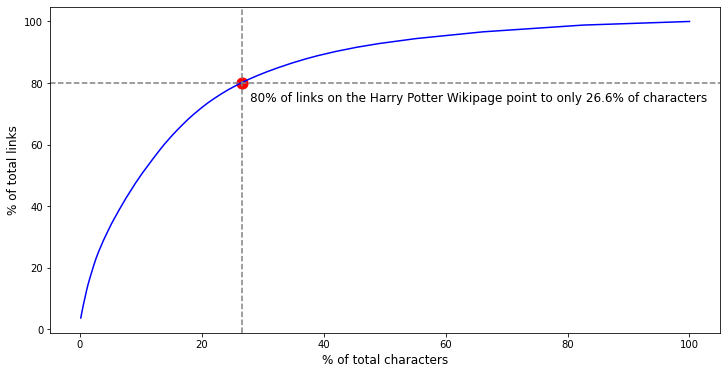

In [83]:
plt.figure(figsize=(12,6))
plt.plot(df_80_20['index_%'],df_80_20['% Cum_sum'],c='blue')
plt.axhline(80,color='grey',linewidth=1.5,linestyle='--')
plt.axvline(26.614,color='grey',linewidth=1.5,linestyle='--')
plt.text(x=28,y=74,s='80% of links on the Harry Potter Wikipage point to only 26.6% of characters',fontsize=12)
plt.scatter(x=26.614,y=80,s=125,c='r',alpha=1)
plt.xlabel('% of total characters',fontsize=12)
plt.ylabel('% of total links',fontsize=12)
plt.show()

Finally, we conclude that our network follows the 80/20 rule, as we can see that in our case the 80% of the network is represented by the 26.6% of the characters. [Ref.](http://networksciencebook.com/chapter/4#power-laws)

### 2.3 Visualization <a class="anchor" id="s_2_3"></a>

In [84]:
def top_n_most_connected(house,n=3):
    df_house_degree=df_degree.loc[df_degree['House']==house]
    return list(df_house_degree.sort_values(by='all_degree',ascending=False)['Name'][:n])
sorted(set(df['House']))

['Gryffindors', 'Hufflepuffs', 'Ravenclaws', 'Slytherins', 'Unknown_House']

In [99]:
House_list = list(nx.get_node_attributes(GCC_ind,'House').values())

color_list, uniques = pd.factorize(House_list)
d = nx.degree(GCC_ind)

house_list = ['Gryffindors', 'Hufflepuffs', 'Ravenclaws', 'Slytherins', 'Unknown_House']
color_list = ['firebrick','yellow','navy','forestgreen','dimgrey']
zip_iterator = zip(house_list, color_list)
dict_color = dict(zip_iterator)

dict_nodes={}
dict_size={}
dict_label={}
i=0
for house in set(df['House']):
    dict_nodes[house]=[x for x,y in GCC_ind.nodes(data=True) if y['House']==house]
    dict_size[house]=np.array([d[x]+1 for x in dict_nodes[house]])*4
    n=3
    if house == 'Gryffindors':
        n=4
    elif house == 'Slytherins':
        n=3
    else: n=3
    dict_label[house]={name:name if name in top_n_most_connected(house,n) else " " for name,y in GCC_ind.nodes(data=True) if y['House']==house}
    
    i+=1
#Color edges
edges = GCC_ind.edges()
color = []
width_egde=[]

for u,v in edges:
    if df.loc[df['Name']==u].House.values[0]=="Gryffindors" and df.loc[df['Name']==v].House.values[0]=="Gryffindors":
        color.append('firebrick')
        width_egde.append(0.5)
    elif df.loc[df['Name']==u].House.values[0]=="Hufflepuffs" and df.loc[df['Name']==v].House.values[0]=="Hufflepuffs":
        color.append('yellow')
        width_egde.append(0.5)

    elif df.loc[df['Name']==u].House.values[0]=="Ravenclaws" and df.loc[df['Name']==v].House.values[0]=="Ravenclaws":
        color.append('navy')
        width_egde.append(0.5)

    elif df.loc[df['Name']==u].House.values[0]=="Slytherins" and df.loc[df['Name']==v].House.values[0]=="Slytherins":
        color.append('forestgreen')     
        width_egde.append(0.5)
    elif df.loc[df['Name']==u].House.values[0]=="Unknown_House" and df.loc[df['Name']==v].House.values[0]=="Unknown_House":
        color.append('dimgrey')     
        width_egde.append(0.5)
    
#     elif df.loc[df['Name']==u].House.values[0]=="Gryffindors" and df.loc[df['Name']==v].House.values[0]=="Slytherins" \
#         and d[df.loc[df['Name']==u].Name.values[0]]>60 and d[df.loc[df['Name']==v].Name.values[0]]>60 :
#         color.append('black')     
#         width_egde.append(1)
    else:
        color.append('lightgrey')
        width_egde.append(0.2)
        
# # pos = nx.kamada_kawai_layout(GCC_ind)
pos_1 = nx.shell_layout(GCC_ind) #GOOD ONE ! 
pos_2 = nx.spring_layout(GCC_ind,k=9,iterations=115,pos=pos_1)

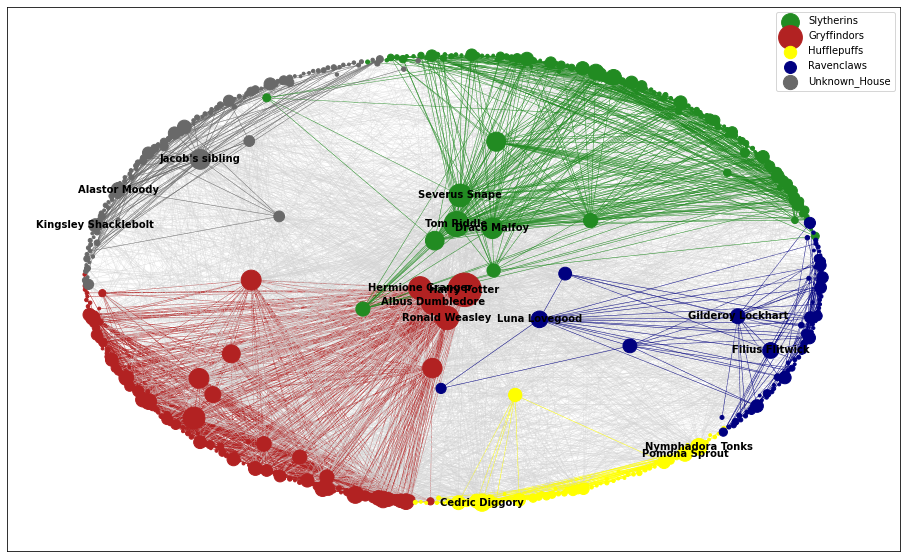

In [101]:
plt.figure(figsize=(16,10))

for house in set(df['House']):
    nx.draw_networkx_nodes(GCC_ind, pos=pos_2, nodelist=dict_nodes[house],node_size=dict_size[house],
                       node_color=dict_color[house], label=house)
    nx.draw_networkx_labels(GCC_ind,pos=pos_2,labels=dict_label[house], font_size=10,font_weight='bold')
    
nx.draw_networkx_edges(GCC_ind, pos=pos_2,edge_color=color,width=width_egde)

plt.legend()
plt.show()
#plt.savefig('figures/graph_houses.png')

In [95]:
G = GCC.copy()
colorParm = []
node_sizes = []
degree_dict = {n: d for n, d in G.degree()}
for node in G.nodes():
    if G.nodes[node]['House'] == "Gryffindors":
        colorParm.append("#660000") # Allies in blue
    elif G.nodes[node]['House'] == "Hufflepuffs":
        colorParm.append("#FF9D0B") # Enemies in red
    elif G.nodes[node]['House'] == "Ravenclaws":
        colorParm.append("#1A3956") #  Bosses in purple
    elif G.nodes[node]['House'] == "Slytherins":
        colorParm.append("#2F751C") # Enemies in red
    elif G.nodes[node]['House'] == "Unknown_house":
        colorParm.append("#aa00aa") #  Bosses in purple
    else:
        colorParm.append("#c7c7c7")
    node_sizes.append(degree_dict[node])
    
 

In [96]:
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1,

                        # Performance
                        jitterTolerance=10,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=15,
                        strongGravityMode=False,
                        gravity = 500,

                        # Log
                        verbose=True)

new_node_sizes = [x * 10 for x in node_sizes]
positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=1000)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 180.15it/s]

BarnesHut Approximation  took  0.87  seconds
Repulsion forces  took  4.35  seconds
Gravitational forces  took  0.03  seconds
Attraction forces  took  0.04  seconds
AdjustSpeedAndApplyForces step  took  0.13  seconds


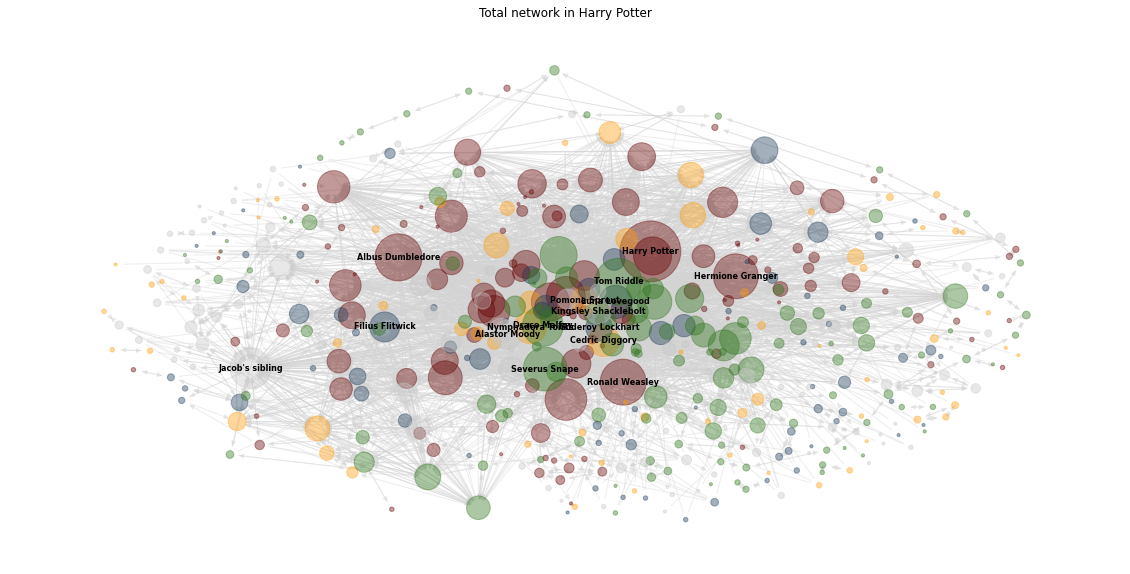

In [98]:
fig = plt.figure(figsize=(20, 10))
nx.draw_networkx_nodes(G, positions, node_size=new_node_sizes, node_color=colorParm, alpha=0.4)
nx.draw_networkx_edges(G, positions, edge_color="lightgray", alpha=0.4)
for house in set(df['House']):
    nx.draw_networkx_labels(G,pos=positions,labels=dict_label[house], font_size=8,font_weight='bold')


plt.title("Total network in Harry Potter")
plt.axis('off')
fig.show()
#plt.savefig('figures/graph_harrypotter.png',dpi = 300)

## 3. Tools, theory and analysis <a class="anchor" id="c3"></a>

### 3.1 Project 1: WordCloud analysis of houses <a class="anchor" id="s3_1"></a>

#### 3.1.1 Motivation

This part is about analysing the different houses of Hogwarts with the use of wordclouds, i.e. we will generate images consisting of words, with the size of the words in the image proportional to the number of times that word appear in the string used to generate the image. Firstly, we want to analyse how the members of the different houses speak and see if there are any patterns/trends there. Secondly, we want to use the characters' wiki-descriptions to look for any trends/differences between the houses.

#### 3.1.2 Tool

##### Part a: WordClouds based on character dialogue



For the analysis of the way members of the different houses speak, we will use the movie scripts data. In order to have useful data for this part, we will need to load and prepare the movie data, which can be done in the following steps:

- Step 1: Load the dialogues from all 8 movies into one pandas DataFrame. Each row in this DataFrame is one dialogue, where the movie name is given in one column, the name of the character speaking is given in another column, the chapter name in a third column, and finally the actual dialogue in a the last column.
- Step 2: Change some of the names in the dataframe, as there are a few spelling mistakes, and some characters such as Voldemort are referred to as both Voldemort and Tom Riddle. We want just one name per character.
- Step 3: Add the House of the character, which is done using the data obtained from the Wiki page.
- Step 4: A brief cleaning of the data consisting of removing any character that isn't a letter or an apostrophe, and putting it all in lowercase
- Step 5: Tokenize the dialogue. For this a function is created. This function takes the dialogue input as a string and returns a list of words (tokens). It does so with the use of the NLTK library's lemmatizer and tokenizer. The tokenizer function also splits up contracted words into their base words, and removes stop words as they aren't useful for this.
- Step 6: Combine all the dialogues for each unique character, creating a long list of tokens consisting of every word (apart from the removed stopwords) each character has said throughout the 8 movies.

Once the data has been prepared we can start analysing it using the wordcloud library. One way to do this is to simply combine all tokens of characters belonging to one house, convert them into one string, and then use that string to generate the wordcloud. While this should provide a decent representation, there is a better way to do it, that is, using the tc-idf score of the words. The tc-idf score of a word is the product of its term count and the inverse document frequency, where term count is the number of times that word appears in a document (in our case a charater's complete dialogue) and the inverse document frequency is the log of the total number of documents divided by the number of documents in which the word appears. Using the tc-idf ensures that words which don't appear often have a greater importance, meaning the more unique words said by characters will be weighted more, hence the differences should be more noticeable using this method.

We will use both methods and compared the results. We will first create the wordclouds simply based on the characters' pure dialogue for each house where the steps are as follows:

- Step 7: Combine all characters of the same house. We will store these and plot them together with the tc-idf WordClouds at the end.

We will then create the WordClouds based on the words' tc-idf scores, where the steps are as follows:

- Step 8: Calculate the term count (tc) of each word. Here we will use the dataframe created in Step 6, the one containing each character's complete dialogue. We will count the number of times a word occurs in each character's complete dialogue, and store it in a dataframe.
- Step 9: Calculate the inverse document frequency (idf).
- Step 10: Calculate tc-idf.
- Step 11: Combine all characters of the same house.
- Step 12: Convert the tc-idf scores of the words to a string of words. The string is made by adding a word x times to the string, where x is the tc-idf score of said word converted to the nearest integer.
- Step 13: Create the wordclouds for both the pure dialogue and the tc-idf scores.



##### Part b: WordcCouds based on character wiki-pages



For the analysis of the characters' wiki-pages, we will use the DataFrame created from the Harry Potter wiki pages. We will again need to prepare this data, however as most of this has already been done, this part is fairly short and just about loading the right data. The steps are as follow:

- Step 1: Load the DataFrame using pickle
- Step 2: Add the characters' wiki-pages descriptions. As these have already been downloaded and saved as files in the folder 'Description_extract', we simply need to add these files to the DataFrame. We also need to remove stopwords and lemmatize the extract, which is also done in this step. Here we also remove the names which occur in the wiki descriptions.

Now that our data has been prepared, we will again create WordClouds based on both the pure character descriptions, and the tc-idf scores of the words. This process is identical to steps 7 - 13 in part a.

####  3.1.3. Applying the tool

##### Part a: WordClouds based on character dialogue


In this section we will follow the steps described in the previous section.

In [64]:
# Function to create tokens (list of words)
def to_tokens(text):
    
    # Init the Wordnet Lemmatizer and get stop words
    lemmatizer = WordNetLemmatizer()
    tk = WordPunctTokenizer()
    stop_words = set(stopwords.words('english')) 
    
    tokens = []
    for word in text.split():
        if word.lower() in contractions:
            # Add contracted word(s) if it contains an apostrophe
            contracted_words = contractions[word.lower()]
            for x in contracted_words.split():
                tokens.append(x)
        else:
            tokens.append(word)
    # Remove stopwords
    tokens = [lemmatizer.lemmatize(w) for w in tokens if (not w in stop_words) and (w.isalnum())]
            
    return tokens

In [65]:
# Step 1: Create dataframe from all scripts
path='hp-dataset_script'
df_script = pd.concat([pd.read_csv(path+file) for file in ['\hp1.csv','\hp2.csv','\hp3.csv','\hp4.csv',
                                                   '\hp5.csv','\hp6.csv','\hp7.csv','\hp8.csv']])

# Step 2: Change some names so they match the other dataframe
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Ron Weasley'], 'Ronald Weasley'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Ginny Weasley'], 'Ginevra Weasley'))
df_script["character"] =df_script["character"].replace(dict.fromkeys(['Tom','Voldemont','Voldemort','Voldermort'],'Tom Riddle'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Lavander Brown'], 'Lavender Brown'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Horace Horace Slughorn'], 'Horace Slughorn'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Lily Potter','Lily potter'], 'Lily J. Potter'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Pansy parkinson'], 'Pansy Parkinson'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['The Fat Lady'], 'Fat Lady'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Collin Creevey'], 'Colin Creevey'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Bill Weasley'], 'William Weasley'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['James Potter'], 'James Potter I'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Moaning Myrtle'], 'Myrtle Warren'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Nearly Headless Nick'], 'Nicholas de Mimsy-Porpington'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Phineas'], 'Phineas Nigellus Black'))


# Open other DataFrame to get house data
with open(r"pickle_network_prep.txt", "rb") as fp:
    df_all = pickle.load(fp)

# Step 3: Add house data to current dataframe
df_house = df_all[['Name', 'House']].rename(columns={'Name': 'character'})
df_script = pd.merge(df_script, df_house, on="character", how='left')


# Step 4: Clean data
brief_cleaning = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df_script['dialog'])
df_script["clean"] = pd.DataFrame({'clean': brief_cleaning})
df_script['len_clean']=df_script["clean"].apply(len)


# Step 5: Create tokens
df_script['tokens'] = df_script["clean"].apply(lambda x: to_tokens(x))


# # Save df_script DataFrame in a pickle as it will be used later on
# with open("df_script.txt", "wb") as fp:
#     pickle.dump(df_script, fp)


df_script.head()

movie            chapter  \
0  Harry Potter and the Philosopher's Stone  Doorstep Delivery   
1  Harry Potter and the Philosopher's Stone  Doorstep Delivery   
2  Harry Potter and the Philosopher's Stone  Doorstep Delivery   
3  Harry Potter and the Philosopher's Stone  Doorstep Delivery   
4  Harry Potter and the Philosopher's Stone  Doorstep Delivery   

            character                                             dialog  \
0    Albus Dumbledore  I should have known that you would be here...P...   
1  Minerva McGonagall  Good evening, Professor Dumbledore. Are the ru...   
2    Albus Dumbledore   I'm afraid so, Professor. The good, and the bad.   
3  Minerva McGonagall                                       And the boy?   
4    Albus Dumbledore                            Hagrid is bringing him.   

         House                                              clean  len_clean  \
0  Gryffindors  i should have known that you would be here pro...         64   
1  Gryffindors  good evening professor dumbledore are the rumo...         61   
2  Gryffindors      i'm afraid so professor the good and the bad          45   
3  Gryffindors                                       and the boy          12   
4  Gryffindors                            hagrid is bringing him          23   

                                              tokens  
0              [known, would, professor, mcgonagall]  
1  [good, evening, professor, dumbledore, rumour,...  
2                     [afraid, professor, good, bad]  
3                                              [boy]  
4                                 [hagrid, bringing]

In [66]:
### Pure dialogue ###

# Step 6: Combine all the dialogues for each unique character

# Function to combine the dialogue for each character
def combine_lists(name):
    x = list(df_script.groupby(['character']).get_group(name)['tokens'])
    flat_list = [item for sublist in x for item in sublist]
    return flat_list

# Create a new dataframe with one row per character
df_temp = pd.DataFrame(sorted(list(df_script.character.unique())), columns =['character'])
df_characters = pd.merge(df_temp, df_house, on="character", how='left')

# Add all the tokens of each characters
df_characters['tokens'] = df_characters['character'].apply(lambda x: combine_lists(x))

# Add the lengths of the tokens
df_characters['token_lengths'] = df_characters['tokens'].apply(lambda x: len(x))

#  Remove the characters who say less than 50 words
df_characters = df_characters.drop(df_characters[df_characters.token_lengths < 50].index)
df_characters = df_characters.reset_index(drop=True)


# Step 7: Combine characters' dialogue by house

# Split dataframe by House
df_groups = df_characters.groupby(['House'])

# Combine all dialoges for each House
Gryffindor_list = [item for sublist in list(df_groups.get_group('Gryffindors')["tokens"]) for item in sublist]
Ravenclaw_list = [item for sublist in list(df_groups.get_group('Ravenclaws')["tokens"]) for item in sublist]
Slytherin_list = [item for sublist in list(df_groups.get_group('Slytherins')["tokens"]) for item in sublist]
Hufflepuff_list = [item for sublist in list(df_groups.get_group('Hufflepuffs')["tokens"]) for item in sublist]

all_sentences = []
for x in [Gryffindor_list, Ravenclaw_list, Slytherin_list, Hufflepuff_list]:
    all_sentences.append(" ".join(x))

In [67]:
### tc-idf scores of dialogue ###

# Step 8: Calculate term count
vocabulary = set(df_characters['tokens'].explode())
temp_tc = []
# Loop through all characters
for index, row in df_characters.iterrows():
    # Create empty frequency table and fill it up
    freq_table = dict.fromkeys(vocabulary,0)
    for word in row['tokens']:
        if word in vocabulary:
            freq_table[word] += 1
    # Add frequency table to temporary tc
    temp_tc.append(pd.DataFrame.from_dict(freq_table, orient='index',columns=[row['character']]))
# Create dataframe
tc = pd.concat(temp_tc,axis=1)


# Step 9: Calculate inverse document frequency
temp_idf=[]
for element in tc.to_numpy():
    temp_idf.append(np.log (len(df_characters)/(1+len(np.where(element > 0)[0]))))
idf = pd.DataFrame(temp_idf, index=vocabulary, columns=['idf'])


# Step 10: Calculate tc-idf score per character
tc_idf = pd.concat([tc,idf],axis=1)
for columns in tc_idf.columns[:-1]:
    tc_idf[columns] = tc_idf[columns]*tc_idf['idf']
tc_idf.drop(columns='idf',inplace=True)


# # # Save tc-idf DataFrame in a pickle as it will be used later on
# with open("tcidf_script.txt", "wb") as fp:   #Pickling
#     pickle.dump(tc_idf, fp)


# Step 11: Add all tc-idf scores for characters of the same house up
Gryffindor_list = list(df_characters[df_characters.House == 'Gryffindors']['character'])
Ravenclaw_list = list(df_characters[df_characters.House == 'Ravenclaws']['character'])
Slytherin_list = list(df_characters[df_characters.House == 'Slytherins']['character'])
Hufflepuff_list = list(df_characters[df_characters.House == 'Hufflepuffs']['character'])
tc_idf['Gryffindor'] = tc_idf[Gryffindor_list].sum(axis=1)
tc_idf['Ravenclaw'] = tc_idf[Ravenclaw_list].sum(axis=1)
tc_idf['Slytherin'] = tc_idf[Slytherin_list].sum(axis=1)
tc_idf['Hufflepuff'] = tc_idf[Hufflepuff_list].sum(axis=1)


# Step 12: Convert tc-idf scores to a string of words relative to the scores
houses = ['Gryffindor', 'Ravenclaw', 'Slytherin', 'Hufflepuff']
houses_tcidf = tc_idf[houses]
houses_descriptions = [""]*len(houses)
for i in range(len(houses)):
    words = []
    for word in vocabulary:
        count = int(houses_tcidf[houses[i]][word])
        words = words + [word]*count  
    houses_descriptions[i] = " ".join(words)

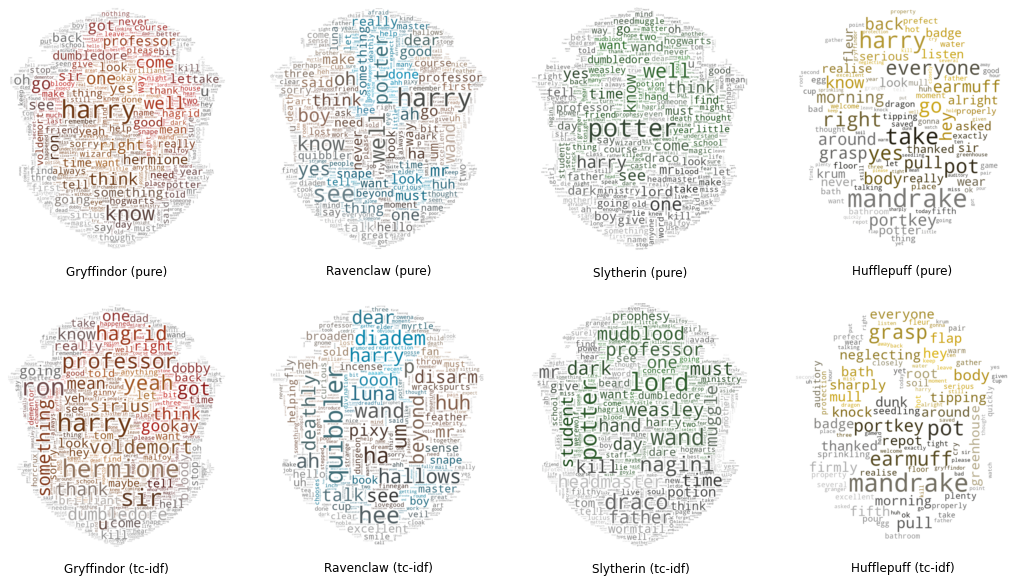

In [92]:
# Step 13: Show WordClouds
fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize = (18,10))

for i in range(len(houses)):
    
    # Pure dialogue
    # load image which is used for shape and colour of wordcloud
    mask = np.array(Image.open(f'house_images/{houses[i]}.png').convert('RGB'))
    image_colors = ImageColorGenerator(mask)
    # Create the wordcloud
    wc = WordCloud(background_color='white', max_words=1000, mask = mask,
                   max_font_size=80, collocations = False).generate(all_sentences[i])
    # Plot each wordcloud
    ax = axs[0,i]
    ax.plot()
    ax.axis("off")
    ax.text(0.5,-0.1, f'{houses[i]} (pure)', size=12, ha="center", transform=ax.transAxes)
    ax.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
    
    # tc-idf scores
    # load image which is used for shape and colour of wordcloud
    mask = np.array(Image.open(f'house_images/{houses[i]}.png').convert('RGB'))
    image_colors = ImageColorGenerator(mask)
    # Create the wordcloud
    wc = WordCloud(background_color='white', max_words=1000, mask = mask,
                   max_font_size=80, collocations = False).generate(houses_descriptions[i])
    # Plot each wordcloud
    ax = axs[1,i]
    ax.plot()
    ax.axis("off")
    ax.text(0.5,-0.1, f'{houses[i]} (tc-idf)', size=12, ha="center", transform=ax.transAxes)
    ax.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")

#plt.savefig('figures/script_WordClouds.png')

##### Part b: WordClouds based on character wiki-pages

We will again follow the steps from the previous section

In [69]:
# Step 1: Load the DataFrame
with open(r"pickle_network_prep.txt", "rb") as fp:
    df_all = pickle.load(fp)

# Step 2: Add the character description files to the DataFrame
tk = WordPunctTokenizer()
names_list = [n.lower() for n in df_all.Name]
stop_words = set(stopwords.words('english'))
page_path = "Description_extract/"
lemmatizer = WordNetLemmatizer()

# Get the names of the most important characters
important_characters = list(df_script.character.value_counts()[df_script.character.value_counts() >= 20].index)
names_split = [item.lower() for sublist in [x.split() for x in important_characters] for item in sublist]\
            +['ron','ginny']\
            +['lily', 'james', 'pettigrew']\
            +['quirrel', 'flitwick', 'sprout']

list_description_extract = []
for index, row in df_all.iterrows():
    with open(page_path+row['Name']+'.txt','r') as f:
        # Remove whitespace characters
        node_description = f.read().replace('\\n', '').replace('\\t', '').replace('"', '')
        
        # Put lower case
        node_description = node_description.lower()
    
        # Remove names
        for name in names_split:
            node_description = re.sub(name+'(?:s*)','', node_description)
        
        # Tokenize and remove stopwords
        node_description = tk.tokenize(node_description)
        node_description = [lemmatizer.lemmatize(w) for w in node_description if (not w in stop_words) and (w.isalnum())]
    list_description_extract.append(node_description)
    
df_all["Description_extract"] = list_description_extract

In [70]:
### Pure wiki pages ###

# Step 3: Combine characters' dialogue by house

# Split dataframe by House
df_wiki_groups = df_all.groupby(['House'])

# Combine all dialoges for each House
Gryffindor_wiki_list = [item for sublist in list(df_wiki_groups.get_group('Gryffindors')["Description_extract"]) for item in sublist]
Ravenclaw_wiki_list = [item for sublist in list(df_wiki_groups.get_group('Ravenclaws')["Description_extract"]) for item in sublist]
Slytherin_wiki_list = [item for sublist in list(df_wiki_groups.get_group('Slytherins')["Description_extract"]) for item in sublist]
Hufflepuff_wiki_list = [item for sublist in list(df_wiki_groups.get_group('Hufflepuffs')["Description_extract"]) for item in sublist]
#Unknown_list = [item for sublist in list(df_groups.get_group('Unknown')["tokens"]) for item in sublist]

all_wiki_sentences = []
for x in [Gryffindor_wiki_list, Ravenclaw_wiki_list, Slytherin_wiki_list, Hufflepuff_wiki_list]:
    all_wiki_sentences.append(" ".join(x))

In [71]:
### tc-idf scores of wiki pages ###

# Step 4: Calculate term count
wiki_vocabulary = set(df_all['Description_extract'].explode())
temp_tc = []
# Loop through all characters
for index, row in df_all.iterrows():
    # Create empty frequency table and fill it up
    freq_table = dict.fromkeys(wiki_vocabulary,0)
    for word in row['Description_extract']:
        if word in wiki_vocabulary:
            freq_table[word] += 1
    # Add frequency table to temporary tc
    temp_tc.append(pd.DataFrame.from_dict(freq_table, orient='index',columns=[row['Name']]))
# Create dataframe
wiki_tc = pd.concat(temp_tc,axis=1)


# Step 5: Calculate inverse document frequency
temp_idf = []
for element in wiki_tc.to_numpy():
    temp_idf.append(np.log (len(df_all)/(1+len(np.where(element > 0)[0]))))
wiki_idf = pd.DataFrame(temp_idf, index=wiki_vocabulary, columns=['idf'])


# Step 6: Calculate tc-idf score per character
wiki_tcidf = pd.concat([wiki_tc, wiki_idf],axis=1)
for columns in wiki_tcidf.columns[:-1]:
    wiki_tcidf[columns] = wiki_tcidf[columns]*wiki_tcidf['idf']
wiki_tcidf.drop(columns='idf',inplace=True)

# # Save tc-idf DataFrame in a pickle as it will be used later on
# with open("tcidf_wiki.txt", "wb") as fp:
#     pickle.dump(wiki_tcidf, fp)


# Step 7: Add all tc-idf scores for characters of the same house up
Gryffindor_wiki_list = list(df_all[df_all.House == 'Gryffindors']['Name'])
Ravenclaw_wiki_list = list(df_all[df_all.House == 'Ravenclaws']['Name'])
Slytherin_wiki_list = list(df_all[df_all.House == 'Slytherins']['Name'])
Hufflepuff_wiki_list = list(df_all[df_all.House == 'Hufflepuffs']['Name'])
wiki_tcidf['Gryffindor'] = wiki_tcidf[Gryffindor_list].sum(axis=1)
wiki_tcidf['Ravenclaw'] = wiki_tcidf[Ravenclaw_list].sum(axis=1)
wiki_tcidf['Slytherin'] = wiki_tcidf[Slytherin_list].sum(axis=1)
wiki_tcidf['Hufflepuff'] = wiki_tcidf[Hufflepuff_list].sum(axis=1)


# Step 8: Convert tc-idf scores to a string of words relative to the scores
houses = ['Gryffindor', 'Ravenclaw', 'Slytherin', 'Hufflepuff']
houses_wiki_tcidf = wiki_tcidf[houses]
houses_wiki_descriptions = [""]*len(houses)
for i in range(len(houses)):  
    words = []
    for word in wiki_vocabulary:
        count = int(houses_wiki_tcidf[houses[i]][word])
        words = words + [word]*count      
    houses_wiki_descriptions[i] = " ".join(words)

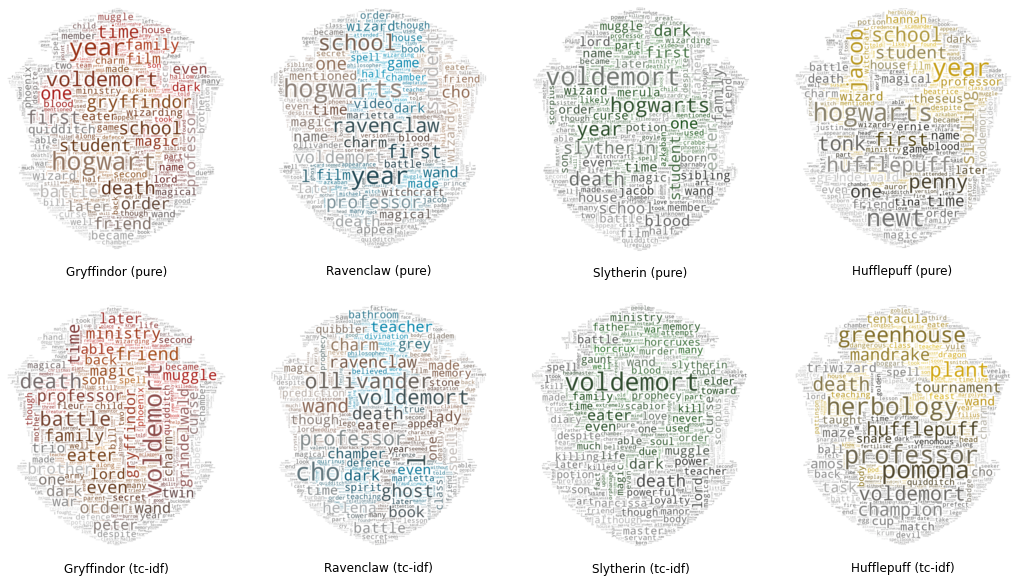

In [93]:
# Step 9: Show WordClouds
fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize = (18,10))

for i in range(len(houses)):
    
    # Pure wiki text
    # load image which is used for shape and colour of wordcloud
    mask = np.array(Image.open(f'house_images/{houses[i]}.png').convert('RGB'))
    image_colors = ImageColorGenerator(mask)
    # Create the wordcloud
    wc = WordCloud(background_color='white', max_words=1000, mask = mask,
                   max_font_size=80, collocations = False).generate(all_wiki_sentences[i])
    # Plot each wordcloud
    ax = axs[0, i]
    ax.plot()
    ax.axis("off")
    ax.text(0.5,-0.1, f'{houses[i]} (pure)', size=12, ha="center", transform=ax.transAxes)
    ax.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
    
    
    # tc-idf scores
    # load image which is used for shape and colour of wordcloud
    mask = np.array(Image.open(f'house_images/{houses[i]}.png').convert('RGB'))
    image_colors = ImageColorGenerator(mask)
    # Create the wordcloud
    wc = WordCloud(background_color='white', max_words=1000, mask = mask,
                   max_font_size=80, collocations = False).generate(houses_wiki_descriptions[i])
    # Plot each wordcloud
    ax = axs[1, i]
    ax.plot()
    ax.axis("off")
    ax.text(0.5,-0.1, f'{houses[i]} (tc-idf)', size=12, ha="center", transform=ax.transAxes)
    ax.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")

#plt.savefig('figures/wiki_WordClouds.png')

#### 3.1.4 Discuss the outcome

* No transformation vs TC-IDF
> * Gryffindor: The words "Student","first","year" and"Gryffindor" have been erased in the Word clouds made with TC-IDF.
> * Ravenclaw: The words "School", "year" and "Hogwarts" have been erased in the Word clouds made with TC-IDF.
> * Slytherin: The words "first", "family" and "Hogwarts" have been erased in the Word clouds made with TC-IDF.
> * Hufflepuff: The words "School", "newt" and "Hogwarts" have been erased in the Word clouds made with TC-IDF.

As a summary, TC-IDF by assigning a value to a term according to its importance in a document scaled by its importance across all documents in your corpus **mathematically eliminates** occurring words in the English language and in the corpus, and **selects words that are more descriptive of your text.** \
NLP tasks such as text summarization, information retrieval, and sentiment classification are therefore some tasks that utilize TC-IDF for its powerful weighing operation.
<!-- * Wordcloud TC-IDF result analysis:
> Gryffindor:
> * Voldemort
> * quirrel, flitwick, sprout
> *
> Ravenclaw: The words "School", "year" and "Hogwarts" have been erased in the Word clouds made with TC-IDF. \
> Slytherin: The words "first", "family" and "Hogwarts" have been erased in the Word clouds made with TC-IDF. \
> Hufflepuff: The words "School", "newt" and "Hogwarts" have been erased in the Word clouds made with TC-IDF. \
Sprout: Head of Hufflepuff
 -->
 
As the tc-idf WordClouds are more descriptive, we will use these for analysing both the script and the wiki descriptions.

* **tc-idf WordClouds based on dialogue**
> Gryffindor:
> * We can see that the names Harry, Ron and Hermione appear a lot in the Gryffindor script. This makes sense as these are the three main characters we follow throught the movies and they are all from the Gryffindor house, hence when they talk to each other they will likely say each other's names. The fact that the word Voldemort also appears often shows that Voldemort is an imprtant charcter in the movies, but also that the main characters aren't scared of saying "He-who-must-not-be-named"'s name, character traits of true heros.
>
> Ravenclaw:
> * One name which appears often here is Luna, which is from Luna Lovegood who is an important character of the Ravenclaw house. Words such as "wand" and "disarm" show that often when we come across Ravenclaw charcters in the movies it involves them performing magic. Finally, two words of great importance are "deathly" and "hallows" which display the part members of the Ravenclaw house played during the wars in the final two movies (Harry Potter and the Deathly Hallows part 1 and 2). Luna Lovegood's father, Xenophilius Lovegood, wears a symbol of the Deathly Hallows, which could be another reason why those words appear so much.
>
> Slytherin:
> * One thing that stands out here after havig watched the movies are the words "Potter", "Weasley", and "mudblood", which isnantly makes one thing of Draco Malfoy when he mucks the trio. He often refers to Hermione as "mudblood", and refers to Harry and Ron as "Potter" and "Weasley" in very degreading ways. Words such as "lord" and "prophesy" shows that the Slytherins look up to "Lord Voldemort", and words like "kill" show their even nature.
>
> Hufflepuff:
> * Basically all words in the script tc-idf WordCloud of the Hufflepuff house are associated with the Mandrake plants. Words like "mandrake", "seeding", "earmuffs", "pull" and "pot" show this.

* **tc-idf WordClouds based on wiki descriptions**
> All houses:
> * Some words that occur in the WordClouds of each house are words such as "professor", "death", "wand" and "magic". These words describe the overall jist of the movies: It's about magic at a school, and there's a lot of death and grief.
>
> Gryffindor:
> * "friend", "muggle" and "battle" are some of the words that stand out in the Gryffindor WordCloud. The fact that words liek "friend" and "muggle" appear often could be a sign that the Gryffindor house is more open for muggle-born wizards and witches, and also has a more friendly vibe than other houses. The word "battle" might show that the are a lot of members of the Gryffindor house who are involved in the battle aginst Voldemort.
>
> Ravenclaw:
> * For the Ravenclaws, word such as "book" and "class" show that they have a strong focus on academia.
>
> Slytherin:
> * Here, the word "voldemort" stands out even more than in the other houses' WordClouds, this makes sense since many Slytherins are fighting for him, and he himself is a part of the Slytherin house. Words like "kill" and "killing" again show the evil nature of the Slytherins.
>
> Hufflepuff:
> * Again, here for the WordClouds based on the wiki descriptions, a major part of the Hufflepuff WordCloud is based around the plants. "plant", "greenhouse", "mandrake", and "herbology" show this.

### 3.2 Project 2: Communities <a class="anchor" id="s3_2"></a>

#### i. Points of interest

In this section we will group all the characters together into communities using the Louvain algorithm. We will do this in order to see if any interesting partitions occur, e.g. will all the professors end up in a group together? Will the "good" characters be grouped together and the "evil" characters together?

#### ii. Explain the tool


This section contains two parts, first the creation of the communities using the Louvain algorith, and secondly some analysis of the communites.

##### part a: Identifying the communities



The Louvain algorithm belongs to the class of modularity maximization algorithms for community detection, it tries to optimize the overall modularity of the found partitionning. In terms of its functioning, it works by repeating two steps until the communities found in the last iteration don't have a better modularity than those in the previous iteration. These 2 steps are:
* **Step One:**
Each node in the network is assigned its own community, and the modularity of the graph is calculated. Then, each node is grouped with each of its neighbours to form a new tentative community, and the net change in total modularity is calculated from the resulting graph. Once this has been done for all of a node's neighbours, the tentative community that provided the greatest increase in modularity is chosen and becomes an actual community (that is, the two nodes that were grouped are assigned the same community). The algorithm then procedes to the next node and does the same until all nodes have been processed.


* **Step Two:**
The second step consists in building a new network in which each newly determined community is represented by a single node. The weights of the links between the nodes (former communities) in the new network are given by summing up the weights of the links between nodes in the two former communities. After the creation of the network, step one is done again. 

The algorithm ends when there is no more positive gain achieved to the modularity of the network when re-doing step one.

We are using the **Louvain algorithm** in order to identify our communities. It is worth noting that the Louvain algorithm is nondeterministic and dependent on the order in which the nodes are processed. That is why we have used a random seed, so that we can comment on the results without having to worry about them changing if the notebook is run again.


##### part b: Analysing the communities

Once we have identified the communities using the Louvain algorithm, we will use several techniques to identify what trends each communities have.

- Step 1: We will plot the size of each community.
- Step 2: First we will print the 10 members of each community with the highest degree. From this we can use our own knowledge of Harry Potter, as well as looking up the charcter wiki pages to identify trends. We will also be able to see here if any communities contain less than 10 members.
- Step 3: We will then create WordClouds based on both characters' of each communities dialogue, as well as their wiik pages. Here we will be able to see if there are any patterns in how the members of each community speaks, or how they are described. We will be creating WordClouds using the tc-idf scores of words for this part.
- Step 4: The final analysis step of the community analysis is looking at the sentiment of each community. For this part we can only analyse the communities that contain characters who speak in the movies.

#### iii. Applying the tool

##### part a: Identifying the communities

We will now apply the tools described in ii to create the communities.

In [73]:
# Step 1: Load the DataFrame
with open(r"pickle_network_final.txt", "rb") as fp:   # Unpickling
    df = pickle.load(fp)

# Step 2: Creation of a Weighted graph
page_path = "Description/"

def characters_connections(name,page_path= "Description/"):
    with open(page_path+name+'.txt','r') as f:
        node_description= f.read()

    new_reg_link = r'\[\[(.*?)(?:\|.*?)?\]\]'

    caracters_in_page=[]
    linked_names_quick= re.findall(new_reg_link,node_description)
    for element in linked_names_quick:
        if element in list(df.Name) and element !=name:
            caracters_in_page.append(element)
    try:
#         final=normalize(Counter(caracters_in_page),target=1) 
        final=Counter(caracters_in_page)
    except:
        final ={}
    return final

# sorted(characters_connections('Harry Potter').items(), key=lambda x: x[1], reverse=True) 
characters_connections_list={}
for name in tqdm(list(df['Name'])):
    characters_connections_list[name]=characters_connections(name)
df_weight = df.copy() 
df_weight.reset_index(inplace=True,drop=True)
df_weight['poids_lien']=list(characters_connections_list.values())

100%|██████████| 511/511 [00:03<00:00, 159.51it/s]


In [74]:
#Step 3: Weighted graph
G_weight = nx.DiGraph()
for index, row in df_weight.iterrows():
    G_weight.add_node(row['Name'], House=row['House'], Gender=row['Gender'],Blood=row['Blood'],Species=row['Species'] \
                          , Nationality=row['Nationality'], Heigh=row['Heigh'],Weight=row['Weight'],Eyes=row['Eyes'] \
                          ,Skin=row['Skin'])
G_weight.nodes()
    
keys_=df_weight['Name'].values
values_=df_weight['poids_lien'].values
dictionary_poids_lien= dict(zip(keys_, values_))

weigh_list=[]
for name,mini_dict in dictionary_poids_lien.items():
    for keys,weight_values in mini_dict.items():
            G_weight.add_edge(name,keys,weight =weight_values)
            weigh_list.append(weight_values)

In [75]:
#Step 4: Louvain communities 
G_weight_ind= G_weight.to_undirected()

partition = community_louvain.best_partition(G_weight_ind,weight='weight',random_state=42)
print('Nb of communities:',max(partition.values()) + 1)

reverse_partition= dict((k, []) for k in range(max(partition.values())+1))
for keys, values in partition.items():
    reverse_partition[values].append(keys)


dict_cal = {}
for type_calc in ['House','Gender']:
    test_list = list(nx.get_node_attributes(G_weight_ind,type_calc).values())
    color_list, uniques_test = pd.factorize(test_list)
    dict_test=dict()
    for test_name in uniques_test:
        dict_test[test_name]=[x for x,y in G_weight_ind.nodes(data=True) if y[type_calc]==test_name]
        
    dict_cal[type_calc]=dict_test
    print('{} modularity:'.format(type_calc),nx_comm.modularity(G_weight_ind,list(dict_test.values())))

print('Louvain modularity:',nx_comm.modularity(G_weight_ind,list(reverse_partition.values())))


Nb of communities: 15
House modularity: 0.10789981212207418
Gender modularity: 0.018156954889629207
Louvain modularity: 0.2839878009046988


In [76]:
# Creation of the graph with weight
with open(r"pickle_network_final.txt", "rb") as fp:   # Unpickling
    df = pickle.load(fp)
def characters_connections(name,page_path= "Description/"):
    with open(page_path+name+'.txt','r') as f:
        node_description= f.read()
    new_reg_link = r'\[\[(.*?)(?:\|.*?)?\]\]'
    caracters_in_page=[]
    linked_names_quick= re.findall(new_reg_link,node_description)
    for element in linked_names_quick:
        if element in list(df.Name) and element !=name:
            caracters_in_page.append(element)
    try:
#         final=normalize(Counter(caracters_in_page),target=1)
        final=Counter(caracters_in_page)
    except:
        final ={}
    return final
# sorted(characters_connections('Harry Potter').items(), key=lambda x: x[1], reverse=True)

characters_connections_list={}
for name in tqdm(list(df['Name'])):
    characters_connections_list[name]=characters_connections(name)
df_weight =df.copy()
df_weight.reset_index(inplace=True,drop=True)
df_weight['poids_lien']=list(characters_connections_list.values())
G_weight = nx.DiGraph()
for index, row in df_weight.iterrows():
    G_weight.add_node(row['Name'], House=row['House'], Gender=row['Gender'],Blood=row['Blood'],Species=row['Species'] \
                          , Nationality=row['Nationality'], Heigh=row['Heigh'],Weight=row['Weight'],Eyes=row['Eyes'] \
                          ,Skin=row['Skin'])
G_weight.nodes()
keys_=df_weight['Name'].values
values_=df_weight['poids_lien'].values
dictionary_poids_lien= dict(zip(keys_, values_))
weigh_list=[]
for name,mini_dict in dictionary_poids_lien.items():
    for keys,weight_values in mini_dict.items():
            G_weight.add_edge(name,keys,weight =weight_values)
            weigh_list.append(weight_values)
            
df_weight['all_degree']=np.array([G_weight.degree(n) for n in G_weight.nodes()])
def top_x_names_by_all_degree(top=20):
    return list(df_weight.sort_values(by='all_degree',ascending=False)['Name'][:top].values)

community_partition=pd.DataFrame.from_records([partition]).transpose()
list_of_col=df.columns
partition_def = community_partition.merge(df_weight,how='inner',left_index=True,right_on='Name')
partition_def.reset_index(drop=True, inplace= True)
partition_def = partition_def.rename(columns={0: 'Partition'})

100%|██████████| 511/511 [00:03<00:00, 161.43it/s]


##### part b: Analysing the communities

We will now analyse the identified communities, going through the steps 1-4 described in ii.

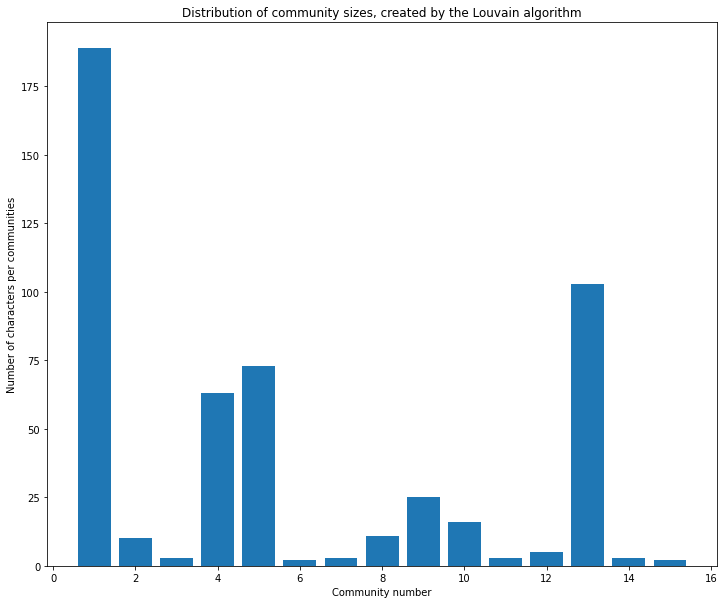

In [98]:
#Step 1: Plotting the communities size
size_communities={}
plt.figure(figsize=(12, 10))
for keys,values in reverse_partition.items():
    size_communities[keys+1] = len(values)
plt.bar(list(size_communities.keys()),list(size_communities.values()))
plt.title('Distribution of community sizes, created by the Louvain algorithm')
plt.xlabel('Community number')
plt.ylabel('Number of characters per communities')
#plt.savefig('figures/communities_sizes.png')
plt.show()

In [99]:
# Step 2: Showing a list of the 10 characters of each community with the highest degree
for i in range(15):
    print(f'{i+1}: ',
          list(partition_def.groupby('Partition').get_group(i).sort_values('all_degree', ascending = False).Name[0:10]))

1:  ['Harry Potter', 'Ronald Weasley', 'Hermione Granger', 'Ginevra Weasley', 'Neville Longbottom', 'Dolores Umbridge', 'Rubeus Hagrid', 'Luna Lovegood', 'Fred Weasley', 'George Weasley']
2:  ['Angelina Appleby', 'Filemina Alchin', 'Oona Ballington', 'Concepta Battista', 'Betty Bickering', 'Hugh Biggs', 'Mike Boon', 'Jason Charmer', 'Sophia Prickett', 'Astrix Alixan']
3:  ['Miles Bletchley', 'Kevin Bletchley', 'Bletchley (musician)']
4:  ['Severus Snape', 'Draco Malfoy', 'Sirius Black', 'Remus Lupin', 'Lucius Malfoy', 'Bellatrix Lestrange', 'Alastor Moody', 'Lily J. Potter', 'Peter Pettigrew', 'James Potter I']
5:  ["Jacob's sibling", 'Nymphadora Tonks', 'William Weasley', 'Charles Weasley', 'Merula Snyde', 'Penny Haywood', 'Rolanda Hooch', 'Barnaby Lee', 'Patricia Rakepick', 'Garrick Ollivander']
6:  ['Louise', "Louise's admirer"]
7:  ['Imogen Stretton', 'Holden Ledbury', 'Jeremy Stretton']
8:  ['Cassius Warrington', 'Ivy Warrington', 'Adrian Pucey', 'Daniel Page', 'Colby Frey', 'Cass

In [100]:
# WordClouds of communities based on wiki descriptions

# Step 1: Load the DataFrame
with open(r"pickle_network_prep.txt", "rb") as fp:
    df_all = pickle.load(fp)
    
# Open df_script
with open(r"df_script.txt", "rb") as fp:   # Unpickling
    df_script = pickle.load(fp)

# Step 2: Add the character description files to the DataFrame
tk = WordPunctTokenizer()
names_list = [n.lower() for n in df_all.Name]
stop_words = set(stopwords.words('english'))
page_path = "Description_extract/"
lemmatizer = WordNetLemmatizer()

# Get the names of the most important characters
important_characters = list(df_script.character.value_counts()[df_script.character.value_counts() >= 20].index)
names_split = [item.lower() for sublist in [x.split() for x in important_characters] for item in sublist]+['ron','ginny']

list_description_extract = []
for index, row in df_all.iterrows():
    with open(page_path+row['Name']+'.txt','r') as f:
        # Remove whitespace characters
        node_description = f.read().replace('\\n', '').replace('\\t', '').replace('"', '')
        
        # Put lower case
        node_description = node_description.lower()
    
        # Remove names
        for name in names_split:
            node_description = re.sub(name+'(?:s*)','', node_description)
        
        # Tokenize and remove stopwords
        node_description = tk.tokenize(node_description)
        node_description = [lemmatizer.lemmatize(w) for w in node_description if (not w in stop_words) and (w.isalnum())]
    list_description_extract.append(node_description)
    
df_all["Description_extract"] = list_description_extract


# Step 3: Load tc-idf scores from WordCloud section
with open(r"tcidf_wiki.txt", "rb") as fp:   # Unpickling
    wiki_tcidf = pickle.load(fp)


# Step 4: Add all tc-idf scores for characters of the same house up
#character_list = df_characters.character.unique()
for i in range(len(reverse_partition)):
    #partition_characters =  [item for item in reverse_partition[i] if item in character_list]
    partition_characters = reverse_partition[i]
    wiki_tcidf[f'community {i+1}'] = wiki_tcidf[partition_characters].sum(axis=1)


# Step 5: Convert tc-idf scores to a string of words relative to the scores
vocabulary = set(df_script['tokens'].explode())
error_count = 0
non_error_count = 0
communities = [f'community {i+1}' for i in range(15)]
communities_wiki_tcidf = wiki_tcidf[communities]
communities_wiki_descriptions = [""]*len(communities)
for i in range(len(communities)):
    words = []
    for word in vocabulary:
        try:
            count = int(communities_wiki_tcidf[communities[i]][word])
            words = words + [word]*count
            non_error_count += 1
        except:
            error_count += 1
    communities_wiki_descriptions[i] = " ".join(words)

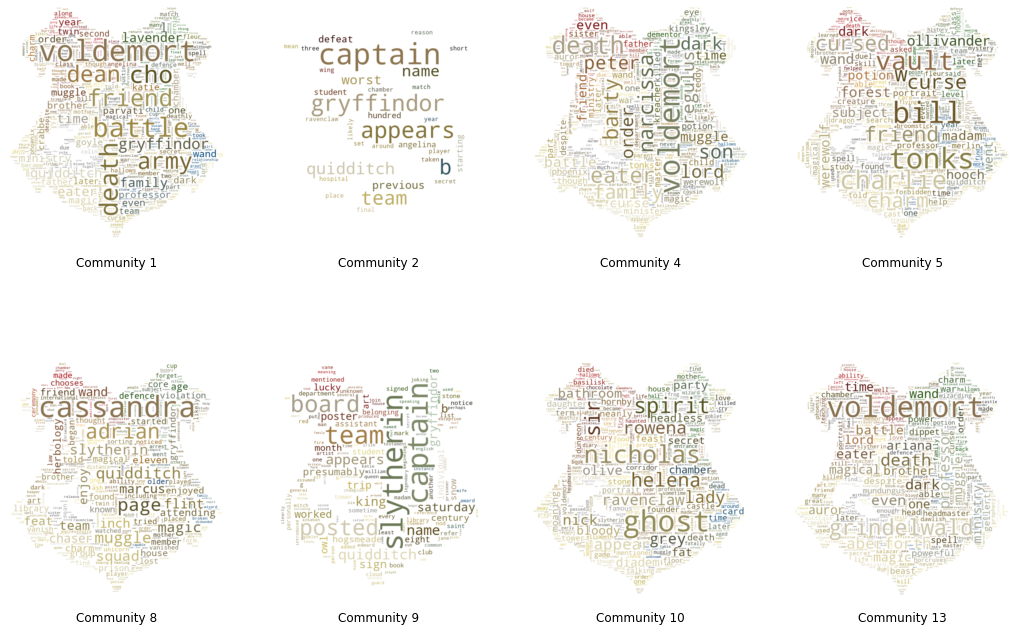

In [101]:
# Step 6: Show WordClouds
from itertools import compress
ll = [len(reverse_partition[i]) >= 10 for i in range(len(reverse_partition))]
communities_id = [i+1 for i, x in enumerate(ll) if x]
communities_large = list(compress(communities_wiki_descriptions, ll))

fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize = (18,12))

for i in range(8):
        
    mask = np.array(Image.open(f'house_images/Hogwarts.png').convert('RGB'))
    image_colors = ImageColorGenerator(mask)

    wc = WordCloud(background_color='white', max_words=1000, mask = mask,
                   max_font_size=80, collocations = False).generate(communities_large[i])

    ax = axs[i//4, i%4]
    ax.plot()
    ax.axis("off")
    ax.text(0.5,-0.1, f'Community {communities_id[i]}', size=12, ha="center", transform=ax.transAxes)
    ax.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
#plt.savefig('figures/communities_WordClouds.png')

In [102]:
# Step 4: Sentiment analysis

# Function to find LabMT score of word
LabMT = pd.read_csv('Data_Set_S1.txt', header=2, delim_whitespace=True)
def vlookup(word, sentiment_dict=LabMT):
    try: 
        return sentiment_dict.loc[sentiment_dict.word==word]['happiness_average'].values[0]
    except:
        return 0

# Function to calculate LabMT score of a list
def labMT_score(l):
    fdist1 =  dict(FreqDist(l))
    my_dictionary = {vlookup(k): v for k, v in fdist1.items()}
    my_dictionary = {k: v for k, v in my_dictionary.items() if k!=0}
    sentement_values = np.array(list(my_dictionary.keys()))
    word_counter = np.array(list(my_dictionary.values()))
    return sentement_values@word_counter/word_counter.sum()

In [103]:
ll = ['']*len(reverse_partition)
character_list = df_script.character.unique()
movies = df_script.movie.unique()
communities_list = []
for i in range(len(reverse_partition)):
    partition_characters = [item for item in reverse_partition[i] if item in character_list]
    if len(partition_characters) > 0:
        communities_list.append(partition_characters)
        ll[i] = True
    else:
        ll[i] = False
communities_id = [i+1 for i, x in enumerate(ll) if x]

# init the sentiment analyzer
sia = SentimentIntensityAnalyzer()
community_list = ['Community 1', 'Community 4', 'Community 5', 'Community 10', 'Community 13']
vader_communities = []
LabMT_communities = []
df_movies = df_script.groupby('movie')

for movie in movies:
    
    movie_df = df_movies.get_group(movie)
    vader_temp = {}
    LabMT_temp = {}
    
    for i in range(len(community_list)):
        
        list_vader = []
        list_LabMT = []
        
        for index, row in movie_df.iterrows():
            if (type(row.clean) == str) and (row.len_clean > 4) and (row.character in communities_list[i]):
                list_vader.append(sia.polarity_scores(row.clean)["compound"])
                list_LabMT += list(row.tokens)
                
        if list_vader==[]:
            vader_temp[community_list[i]] = None
        else:
            vader_temp[community_list[i]]  = round(np.array(list_vader).mean(),3)
        LabMT_temp[community_list[i]] = labMT_score(list_LabMT)
        
    vader_communities.append(vader_temp)
    LabMT_communities.append(LabMT_temp)
    
vader_sentiment = {}
LabMT_sentiment = {}
for community in community_list:
    vader_list = []
    LabMT_list = []
    for i in range(len(movies)):
        vader_list.append(vader_communities[i][community])
        LabMT_list.append(LabMT_communities[i][community])
    vader_sentiment[community] = vader_list
    LabMT_sentiment[community] = LabMT_list

<ipython-input-102-60e2640bde6b>:18: RuntimeWarning:

invalid value encountered in double_scalars



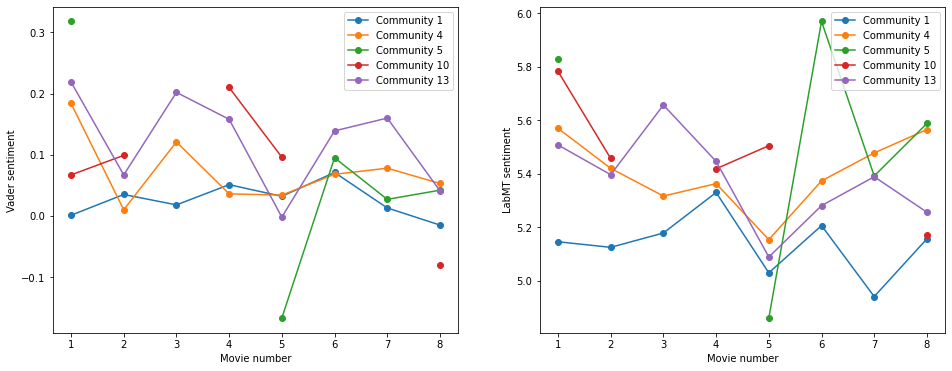

In [104]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (16,6))
ax = axs[0]
ax.plot(np.arange(1,9), vader_sentiment['Community 1'], linestyle='-', marker='o')
ax.plot(np.arange(1,9), vader_sentiment['Community 4'], linestyle='-', marker='o')
ax.plot(np.arange(1,9), vader_sentiment['Community 5'], linestyle='-', marker='o')
ax.plot(np.arange(1,9), vader_sentiment['Community 10'], linestyle='-', marker='o')
ax.plot(np.arange(1,9), vader_sentiment['Community 13'], linestyle='-', marker='o')
ax.legend(['Community 1', 'Community 4', 'Community 5', 'Community 10', 'Community 13'], loc='upper right')
ax.set_ylabel('Vader sentiment')
ax.set_xlabel('Movie number')

ax = axs[1]
ax.plot(np.arange(1,9), LabMT_sentiment['Community 1'], linestyle='-', marker='o')
ax.plot(np.arange(1,9), LabMT_sentiment['Community 4'], linestyle='-', marker='o')
ax.plot(np.arange(1,9), LabMT_sentiment['Community 5'], linestyle='-', marker='o')
ax.plot(np.arange(1,9), LabMT_sentiment['Community 10'], linestyle='-', marker='o')
ax.plot(np.arange(1,9), LabMT_sentiment['Community 13'], linestyle='-', marker='o')
ax.legend(['Community 1', 'Community 4', 'Community 5', 'Community 10', 'Community 13'], loc='upper right')
ax.set_ylabel('LabMT sentiment')
ax.set_xlabel('Movie number')
#plt.savefig('figures/communities_sentiment.png')

#### iv. Discussing the results

We will now have a look at the results and see if we can conclude anything interesting about these communities. Of course we can instantly see from the size distribution plot that community 1 is the largest community by far. Furthermore, when we look at the 10 characters with the highest degree of each community, we also se that this community 1 contains most of the main characters, including Harry, Ron and Hermione. Looking at the other communities' characters with the highest degrees, we can see some interesting patterns form:

- Community 1: This community is the largest by far as can be seen in the distibution of community sizes. We can also see that this partition contains most of the main characters: Harry, Hermione, Ron, Ginny and Hagrid just to name a few.


- Community 2: This community is made up of former Gryffindor quiddich captains. These characers don't appear in person anywhere, but they appear on plaques in the movies.


- Community 3: This community is made up of three people who all share the same surname, Bletchley. None of them are main characters, one of them is even from the game, however in their wiki descriptions it says that they might be related, hence why they ended in the same partition.


- Community 4: This is a fairly large community, and it consists mainly of characters from the Slytherin house.


- Community 5: This is another fairly large community, and this community consists of charcters mainly from the Harry Potter video game.


- Community 6: This community consists of just two people: "Louise", and "Louise's admirer". They both appear in the Harry Potter game: Harry Potter and the Half-Blood Prince.


- Community 7: This is another very small commnity, consisting of just three people: Two Slytherin students who blocked an area of the school together, and one character from the game


- Community 8: This community consists of characters from game and a few old slytherin quiddich players


- Community 9: This is another community consisting of old students of quiddich teams who appear on plaques in the movies


- Community 10: This community contains characters such as Headless Nick, Myrtle Warren and Helena Ravewclaw, who are all ghosts. Indeed, this is a community consisting mainly of the ghosts roaming Hogwarts.


- Community 11: Characters from the game: Harry Potter and the Chamber of Secrets


- Community 12: Characters from the Fantastic Beasts movies, many of whom are part of the British Ministry of Magic


- Community 13: This is another large community, and many of it's members are professors at Hogwarts.


- Community 14: This is a small community, consisting of just three people. These people were members of the Duelling Club in the Training Grounds during the 1996–1997 school year. The members are Maynard Hatton, Fergus Cowley and Anthony Otterburn


- Community 15: This community has just two people: James Tuckett (I) and James Tuckett (II)


We can see how the Louvain algorithm has managed to group the characters together, often manageing to separate charcters of the movies from the characters from the games. The algorithm also managed to sort put old Gryffindor quiddich captain into one group, and other past quiddich playes in another group. The size of the communities varied a lot however, with community 1 having almost 200 members while several other communities didn't even have 10. This meant that some of the communities would be hard to analyse using WordCloud and sentiment analysis since there wouldn't be enough data for proper analysis.

<!-- We will look at the WordClouds, first for the script and secondly for the wiki pages, for each community. For the script, we saw that only communities 1, 4, 5, 10 and 13 contained characters from the movie who actually spoke, thus we could only generate WordClouds for those communities. -->

For the WordClouds based on the wiki descriptions, we decided to only take those communities who had at least 10 members, as to not get any where the WordClouds were only based on two or three people. This leaves us with 8 communities to calculate the WordClouds for. We can see in the WordCloud for community 2 that this community is indeed all about quiddich, as some of the most important words are "quiddich", "appears" and "team", and the fact that "Gryffindor" and "captain" are also very important words shows that it is indeed past Gryffindor quiddich captains. Communities 1 and 4 have several similarities, with words such as "Voldemort", "death", "family", "battle" and "friend" appearing, with high importance, in both WordClouds. As these two communities are both large and seems to mainly consist of characters from the movies, it makes sense that a lot of the words are similar. However, as we found that community 4 had many members of the Slytherin house, one might have expected the WordCloud for community 4 to be more "evil" than community 1, but that doesn't seem to be the case. In communities 8 and 9, we can again see that many of their members were involved with quiddich, especially from the Slytherin house, as words such as "quiddich", "slytherin" and "captain" are very large in these WordClouds. The WordCloud for community 10 also shows that this community does indeed consist of ghosts, as words such as "ghost" and "spirit" are very large, and the names of the ghosts also appear often, e.g. "headless", "nick", "helena", "ravenclaw", etc.

When doing the sentiment analysis of the communities, we could only perform this on the communities which countained characters who spoke in the movies, hence only communities 1, 4, 5, 10 and 13 could be analysed. Furthermore, as the characters from communities 5 and 10 don't have many lines in the movies, not a lot can be concluded from them. However, out of the remaining communities, communities 1, 4 and 13, it can be seen that it is actually community 1 which has the lowest sentiment throught the movies. This could be because it is often the main characters which experience suffering and grief in the movies.

### 3.3 Project 3: Sentiment Analysis  <a class="anchor" id="s3_3"></a>

#### 3.3.1 Motivation

In this section we will look at the characters' sentiment throughout the movies. We will look at the main characters' individual sentiment change throughout the movies, as well as the overall sentiment of each movie and the individual houses' sentiment change throughout the movies. We will be looking at the sentiment of each chapter, and will thus be able to get an insight into the movies.

#### 3.3.2. Tool


First of all, as we will be working with the movie script dataset, we need to first prepare the data. We do that the same way as in [3.1 Project 1:WordCloud analysis of houses - steps 1 to 5](#s3_1) where we fix the names, add house data, clean the text and tokenize the text. We are going to be using both the VaderSentiment and LabMT sentiment analysers to analyse the sentiment of the script.

- Part a: Here we will be analysing the individual characters' sentiment over the duration of all 8 movies, using both Vader Sentiment and LabMT
- Part b: Here we will be analysing the houses' sentiment over the durating of the movies. We will do this by combining the sentiment of each character belonging to a house. Here we will again be calculating the sentiment per chapter, using both Vader Sentiment and LabMT.

#### 3.3.3. Applying the tool

In [105]:
# Function to find LabMT score of word
LabMT = pd.read_csv('Data_Set_S1.txt', header=2, delim_whitespace=True)

def vlookup(word, sentiment_dict=LabMT):
    try: 
        return sentiment_dict.loc[sentiment_dict.word==word]['happiness_average'].values[0]
    except:
        return 0

# Function to calculate LabMT score of a list
def labMT_score(l):
    fdist1 =  dict(FreqDist(l))
    my_dictionary = {vlookup(k): v for k, v in fdist1.items()}
    my_dictionary = {k: v for k, v in my_dictionary.items() if k!=0}
    sentement_values = np.array(list(my_dictionary.keys()))
    word_counter = np.array(list(my_dictionary.values()))
    return sentement_values@word_counter/word_counter.sum()

In [106]:
# Step 1: Create dataframe from all scripts
path='hp-dataset_script'
df_script = pd.concat([pd.read_csv(path+file) for file in ['\hp1.csv','\hp2.csv','\hp3.csv','\hp4.csv',
                                                   '\hp5.csv','\hp6.csv','\hp7.csv','\hp8.csv']])

# Step 2: Change some names so they match the other dataframe
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Ron Weasley'], 'Ronald Weasley'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Ginny Weasley'], 'Ginevra Weasley'))
df_script["character"] =df_script["character"].replace(dict.fromkeys(['Tom','Voldemont','Voldemort','Voldermort'],'Tom Riddle'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Lavander Brown'], 'Lavender Brown'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Horace Horace Slughorn'], 'Horace Slughorn'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Lily Potter','Lily potter'], 'Lily J. Potter'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Pansy parkinson'], 'Pansy Parkinson'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['The Fat Lady'], 'Fat Lady'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Collin Creevey'], 'Colin Creevey'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Bill Weasley'], 'William Weasley'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['James Potter'], 'James Potter I'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Moaning Myrtle'], 'Myrtle Warren'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Nearly Headless Nick'], 'Nicholas de Mimsy-Porpington'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Phineas'], 'Phineas Nigellus Black'))


# Open other df_script and get house data
with open(r"pickle_network_prep.txt", "rb") as fp:   # Unpickling
    df_all = pickle.load(fp)

# Step 3: Add house data to current dataframe
df_house = df_all[['Name', 'House']].rename(columns={'Name': 'character'})
df_script = pd.merge(df_script, df_house, on="character", how='left')


# Step 4: Clean data
brief_cleaning = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df_script['dialog'])
df_script["clean"] = pd.DataFrame({'clean': brief_cleaning})
df_script['len_clean']=df_script["clean"].apply(len)

# Step 5: Create tokens
df_script['tokens'] = df_script["clean"].apply(lambda x: to_tokens(x))

df_script.head()                    

movie            chapter  \
0  Harry Potter and the Philosopher's Stone  Doorstep Delivery   
1  Harry Potter and the Philosopher's Stone  Doorstep Delivery   
2  Harry Potter and the Philosopher's Stone  Doorstep Delivery   
3  Harry Potter and the Philosopher's Stone  Doorstep Delivery   
4  Harry Potter and the Philosopher's Stone  Doorstep Delivery   

            character                                             dialog  \
0    Albus Dumbledore  I should have known that you would be here...P...   
1  Minerva McGonagall  Good evening, Professor Dumbledore. Are the ru...   
2    Albus Dumbledore   I'm afraid so, Professor. The good, and the bad.   
3  Minerva McGonagall                                       And the boy?   
4    Albus Dumbledore                            Hagrid is bringing him.   

         House                                              clean  len_clean  \
0  Gryffindors  i should have known that you would be here pro...         64   
1  Gryffindors  good evening professor dumbledore are the rumo...         61   
2  Gryffindors      i'm afraid so professor the good and the bad          45   
3  Gryffindors                                       and the boy          12   
4  Gryffindors                            hagrid is bringing him          23   

                                              tokens  
0              [known, would, professor, mcgonagall]  
1  [good, evening, professor, dumbledore, rumour,...  
2                     [afraid, professor, good, bad]  
3                                              [boy]  
4                                 [hagrid, bringing]

##### part a: Sentiment of characters throughout the movies

In [111]:
# List of the characters whose sentiment we want to explore
character_list = ['Harry Potter','Ronald Weasley','Hermione Granger','Albus Dumbledore','Tom Riddle','Draco Malfoy',
                 'Rubeus Hagrid','Ginevra Weasley','Neville Longbottom','Severus Snape']

# init the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Initialize the results DataFrame and get a list of all chapters
df_characters = df_script[['movie', 'chapter']].drop_duplicates()
chapters = list(df_script.chapter.unique())
df_chapters = df_script.groupby('chapter')

# Initialize the lists containing the DataFrames with scores for each sentiment analyser
small_dfs_vader = []
small_dfs_LabMT = []
count = 1

for chapter in chapters:
    
    chapter_df = df_chapters.get_group(chapter)
    vader_sentiment = {}
    LabMT_sentiment = {}

    for character in character_list:

        list_vader = []
        list_LabMT = []
        
        # Calculate vader sentiment and add LabMT tokens to a list for the
        # dialogues where it matches the character
        for index, row in chapter_df.iterrows():
            if (type(row.clean) == str)  and (row.character == character):
                list_vader.append(sia.polarity_scores(row.clean)["compound"])
                list_LabMT += list(row.tokens)
        
        # Calculate the vader and LabMT scores
        if list_vader==[]:
            vader_sentiment[character] = None
        else:
            vader_sentiment[character] = round(np.array(list_vader).mean(),3)    
        LabMT_sentiment[character] = labMT_score(list_LabMT)
    
    # Save results to DataFrames
    a = pd.DataFrame(vader_sentiment, index=['vader']).T
    a['character'] = a.index
    a['chapter'] = chapter
    small_dfs_vader.append(a)
     
    b = pd.DataFrame(LabMT_sentiment, index=['LabMT']).T
    b['character'] = b.index
    b['chapter'] = chapter
    b['scene_count'] = count
    small_dfs_LabMT.append(b)
    count += 1
       
# Combine all results to large DataFrame
large_vader = pd.concat(small_dfs_vader, ignore_index=True)
large_LabMT = pd.concat(small_dfs_LabMT, ignore_index=True)
df_characters = pd.merge(df_characters, large_vader, on="chapter", how="outer")
df_characters = pd.merge(df_characters, large_LabMT, on=["chapter", "character"], how="outer")
df_characters.head()

<ipython-input-105-8ef9a951c1aa>:17: RuntimeWarning:

invalid value encountered in double_scalars



movie            chapter  vader  \
0  Harry Potter and the Philosopher's Stone  Doorstep Delivery   None   
1  Harry Potter and the Philosopher's Stone  Doorstep Delivery   None   
2  Harry Potter and the Philosopher's Stone  Doorstep Delivery   None   
3  Harry Potter and the Philosopher's Stone  Doorstep Delivery  0.282   
4  Harry Potter and the Philosopher's Stone  Doorstep Delivery   None   

          character     LabMT  scene_count  
0      Harry Potter       NaN            1  
1    Ronald Weasley       NaN            1  
2  Hermione Granger       NaN            1  
3  Albus Dumbledore  5.765833            1  
4        Tom Riddle       NaN            1

In [122]:
# Initialize some parameters for the plots
l_characters = ['legendonly']*len(character_list)
l = df_characters.groupby('movie').max('scene_count').scene_count.reset_index().sort_values(by='scene_count').scene_count.values
l_x0 = np.concatenate(([1],l[:-1]))
l_x1 = l
list_colors = ['#9FE3FE','#DF9BFD','#FD9DCB','#FFB3A6','#FECF9F','#F7FCA8','#D3FFA5','#B2FEDB']

# Plot the Vader sentiment
fig = go.Figure()
c=0
for character in df_characters['character'].unique():
    fig.add_trace(
    go.Line(x = df_characters[df_characters['character']==character]['scene_count'],
            y = df_characters[df_characters['character']==character]['vader'],
            name = character, visible=l_characters[c]))
    c+=1

for scene in range(len(l)):
    fig.add_vrect(x0=l_x0[scene],x1=l_x1[scene],annotation_text='HP{}'.format(scene+1),annotation=dict(font_size=14),
              fillcolor=list_colors[scene], opacity=0.2, line_width=1.5,annotation_position="top", line_color = 'gray')
fig.update_layout(title='Vader sentiment of characters')
fig.show()
#py.plot(fig, filename='vader_sentiment_Harry_Potter_characters')


# Plot the LabMT sentiment
fig = go.Figure()
c=0
for character in df_characters['character'].unique():
    fig.add_trace(
    go.Line(x = df_characters[df_characters['character']==character]['scene_count'],
            y = df_characters[df_characters['character']==character]['LabMT'],
            name = character, visible=l_characters[c]))
    c+=1

for scene in range(len(l)):
    fig.add_vrect(x0=l_x0[scene],x1=l_x1[scene],annotation_text='HP{}'.format(scene+1),annotation=dict(font_size=14),
              fillcolor=list_colors[scene], opacity=0.2, line_width=1.5,annotation_position="top", line_color = 'gray')
fig.update_layout(title='LabMT sentiment of characters')
fig.show()
#py.plot(fig, filename='LabMT_sentiment_Harry_Potter_characters')

##### part b: Sentiment analysis each house throught the chapters

In [109]:
houses_list = ['Gryffindors', 'Ravenclaws', 'Slytherins', 'Hufflepuffs', 'all']

# init the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Initialize the results DataFrame and get a list of all chapters
df_houses = df_script[['movie', 'chapter']].drop_duplicates()
chapters = list(df_script.chapter.unique())
df_chapters = df_script.groupby('chapter')

# Initialize the lists containing the DataFrames with scores for each sentiment analyser
small_dfs_vader = []
small_dfs_LabMT = []
count = 1

for chapter in chapters:

    chapter_df = df_chapters.get_group(chapter)
    vader_sentiment={}
    LabMT_sentiment={}

    for house in houses_list:
        
        list_vader = []
        list_LabMT = []
        
        # If the "house" is 'all', then we are calculating the sentiment of all characters
        if house == 'all':
            
            # Calculate vader sentiment and add LabMT tokens to a list for all characters
            for index, row in chapter_df.iterrows():
                if type(row.clean) == str:
                    list_vader.append(sia.polarity_scores(row.clean)["compound"])
                    list_LabMT += list(row.tokens)
                    
            # Calculate the vader and LabMT scores   
            if list_vader==[]:
                vader_sentiment[house] = None
            else:
                vader_sentiment[house] = round(np.array(list_vader).mean(),3)
            LabMT_sentiment[house] = labMT_score(list_LabMT)
            
            continue
        
        # Calculate vader sentiment and add LabMT tokens to a list for the
        # dialogues where it matches the house
        for index, row in chapter_df.iterrows():
            if (type(row.clean) == str) and (row.House == house):
                list_vader.append(sia.polarity_scores(row.clean)["compound"])
                list_LabMT += list(row.tokens)
                
        # Calculate the vader and LabMT scores
        if list_vader==[]:
            vader_sentiment[house] = None
        else:
            vader_sentiment[house] = round(np.array(list_vader).mean(),3)
        LabMT_sentiment[house] = labMT_score(list_LabMT)
        
    # Save results to DataFrames
    a = pd.DataFrame(vader_sentiment, index=['vader']).T
    a['House'] = a.index
    a['chapter'] = chapter
    small_dfs_vader.append(a)
    
    b = pd.DataFrame(LabMT_sentiment, index=['LabMT']).T
    b['House'] = b.index
    b['chapter'] = chapter
    b['scene_count'] = count
    small_dfs_LabMT.append(b)
    count += 1

# Combine all results to large DataFrame
large_vader = pd.concat(small_dfs_vader, ignore_index=True)
large_LabMT = pd.concat(small_dfs_LabMT, ignore_index=True)
df_houses = pd.merge(df_houses, large_vader, on="chapter", how="outer")
df_houses = pd.merge(df_houses, large_LabMT, on=["chapter", "House"], how="outer")
df_houses.head()

<ipython-input-105-8ef9a951c1aa>:17: RuntimeWarning:

invalid value encountered in double_scalars



movie            chapter  vader  \
0  Harry Potter and the Philosopher's Stone  Doorstep Delivery  0.211   
1  Harry Potter and the Philosopher's Stone  Doorstep Delivery   None   
2  Harry Potter and the Philosopher's Stone  Doorstep Delivery   None   
3  Harry Potter and the Philosopher's Stone  Doorstep Delivery   None   
4  Harry Potter and the Philosopher's Stone  Doorstep Delivery  0.211   

         House     LabMT  scene_count  
0  Gryffindors  5.766545            1  
1   Ravenclaws       NaN            1  
2   Slytherins       NaN            1  
3  Hufflepuffs       NaN            1  
4          all  5.766545            1

In [121]:
# Initialize some parameters for the plots
l_houses = [True]*len(houses_list)
l=df_houses.groupby('movie').max('scene_count').scene_count.reset_index().sort_values(by='scene_count').scene_count.values
l_x0 = np.concatenate(([1],l[:-1]))
l_x1 = l
list_colors = ['#9FE3FE','#DF9BFD','#FD9DCB','#FFB3A6','#FECF9F','#F7FCA8','#D3FFA5','#B2FEDB']

# Plot Vader sentiment
fig = go.Figure()
c=0
for house in df_houses['House'].unique():
    fig.add_trace(
    go.Line(x = df_houses[df_houses['House']==house]['scene_count'],
            y = df_houses[df_houses['House']==house]['vader'],
            name = house, visible=l_houses[c]))
    c+=1

for scene in range(len(l)):
    fig.add_vrect(x0=l_x0[scene],x1=l_x1[scene],annotation_text='HP{}'.format(scene+1),annotation=dict(font_size=14),
              fillcolor=list_colors[scene], opacity=0.2, line_width=1.5,annotation_position="top", line_color = 'gray')
fig.update_layout(title='Vader sentiment of houses')
fig.show()
#py.plot(fig, filename='Vader_sentiment_Harry_Potter_houses')


# Plot LabMT sentiment
fig = go.Figure()
c=0
for house in df_houses['House'].unique():
    fig.add_trace(
    go.Line(x = df_houses[df_houses['House']==house]['scene_count'],
            y = df_houses[df_houses['House']==house]['LabMT'],
            name = house, visible=l_houses[c]))
    c+=1

for scene in range(len(l)):
    fig.add_vrect(x0=l_x0[scene],x1=l_x1[scene],annotation_text='HP{}'.format(scene+1),annotation=dict(font_size=14),
              fillcolor=list_colors[scene], opacity=0.2, line_width=1.5,annotation_position="top", line_color = 'gray')
fig.update_layout(title='LabMT sentiment of houses')
fig.show()
#py.plot(fig, filename='LabMT_sentiment_Harry_Potter_houses')

#### 3.3.4. Discuss the outcome

As there sentiments are calculated per chapter, there are several characters whose sentiment graphs aren't complete as they don't appear in every chapter. When we look at the main character, Harry Potter, we can see that the VAder sentiment and LabMT sentiment generally tend to follow each other. Sometimes one will have a more extreme peak or dip than the other, for example, the LabMT sentiment has a much more dramatic drop than the vader sentiment at the end of movie 1, where as it's the other way round for a scene near the start of movie 2. The sentiment of Harry Potter seems to remain fairly similar throughout all the movies for both models. When we look at the other two main characters' sentiment compared to Harry Potter's, we can see that they follow each other quite nicely with a few exceptions, Ron for example has a large dip in the first movie where neither of the others have, and both Ron and Hermione have several drops in movie 7 and the start of 8 where Harry doesn't. Looking at some of the other characters, we see that Dumbledore's sentiment is almost always positive/above average, where as Voldemort's is the opposite, as would be expected.

We will now look at the overall sentiment change of the movies as well as the sentiment of each house. First we notice that although the sentiment varies for each chapter, the average sentiment of each movie seems to be about the same. We notice a very large dip in sentiment at the start of movie 2. This is from the scene "Writing on the wall" where Harry hears the snake in the wall talking about killing and and murdering, and Argus Filch says he wants to kill Harry when he sees his cat is dead and thinks Harry was the one who did it. This explains why the sentiment is so low for this scene. The Gryffindor sentiment follows the overall sentiment almost perfectly, which is likely because many of the main characters are from Gryffindor, hence they make up a large part of script. There is however a large drop in sentiment in the LabMT model towards the end of movie 1. For the Ravenclaw and Hufflepuff houses, the same problem a with the characters occurs; there are a lot of chapters where they don't talk, so it is hard to conclude much from their sentiment. For the Slytherin house, we can see that their sentiment is often lower than that of Gryffindor. At the end of movie 8 we see Slytherin has a very high sentiment quickly followed by a very low sentiment, suggesting something changes for the worse for the Slytherins at the end, which is indeed intact with the actual movie.

### 3.4 Project 4: Node to vector: Similarity between characters <a class="anchor" id="s3_5"></a>

#### 3.4.1 Motivation

This graph made with the Fandom Wiki has some underlying knowledge that can be extracted by it structure.
The Louvain community algorithm helped us to understand some of the structure by clustering individuals in group also know as community. However, this does not help us to get information on a node level. 

For instance, what is the most similar/close character to Harry Potter? 
With the Louvain community algorithm, I can only say that Harry potter belong to a certain community but nothing more. May I do better with? 

#### 3.4.2 Tool

**Prerequisite: Skim gram model**
If you are familiar with the word2vec skip-gram model, great, if not I recommend this great post (http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)  which explains it in great detail as from this point forward I assume you are familiar with it.

The skip-gram neural network model is actually surprisingly simple in its most basic form. Train a simple neural network with a single hidden layer to perform a certain task, but then we’re not actually going to use that neural network for the task we trained it on! Instead, the goal is actually just to learn the weights of the hidden layer–we’ll see that these weights are actually the “word vectors” that we’re trying to learn.

<img src="Generation_skip.png" alt="Generation_skip" width="400" style="float: center;" title="Generation_skip"/>

<img src="training.png" alt="training" width="700" style="float: center;" title="Training"/>





**Node2vec is an algorithm to generate vector representations of nodes on a graph. node2vec follows the intuition that random walks through a graph can be treated like sentences in a corpus. Each node in a graph is treated like an individual word, and a random walk is treated as a sentence.**

By feeding these "sentences" into a skip-gram, or by using the continuous bag of words model paths found by random walks can be treated as sentences, and traditional data-mining techniques for documents can be used. 

The algorithm generalizes prior work which is based on rigid notions of network neighborhoods, and argues that the added flexibility in exploring neighborhoods is the key to learning richer representations of nodes in graphs. The algorithm is an extension of Gensim's word2vec algorithm, and is considered one of the best classifiers for nodes in a graph.

The algorithm follow 2 steps: Generation of a chain of nodes with a sampling strategy and training of a Word2vector algorithm such as the skim-gram model.

<img src="node_to_vect.png" alt="Node to vector" width="1500" style="float: center;" title="Node to vector"/>

High level process: 
> 1. From a graph, start from a node and generate a defined number of walks through the network with a certain length, that I will call "Sentence". For instance (Node 1 -> Node 5 -> Node 8 -> Node 6)
> 2. Each of the sentences will be used to train a Word2vector and the output will attached for each unique node, a unique vector.  
> 3. This vector can be compared with other vector by using the cosine similarity
> 4. The most similar vectors can be traceback to their nodes.

For more information, I recommend you to have a look at this create post: https://towardsdatascience.com/node2vec-embeddings-for-graph-data-32a866340fef

**Example: What is the node that is the most similar to the node 1**
> Step 1: Sentences generation 
> * (Node 1 -> Node 5 -> Node 8 -> Node 6)
> * (Node 4 -> Node 2 -> Node 10 -> Node 14)
> * ...
> * (Node 3 -> Node 54 -> Node 8 -> Node 25)

> Step 2: Training of a Word2vector and generation of a unique vector for each node
> * Node 1: vec_node_1=[0.1,0.53,0.958]
> * Node 2: vec_node_2=[-0.7,0.1,-0.4]
> * ...
> * Node 76: vec_node_76=[-0.1,-0.5,0.6]

> Step 3: Compute the cosinus similarity to between each node: 
> * (Node 1, Node 2)= cosinus_similarity (vec_node_1,vec_node_2)= 0.6
> * ...
> * (Node 1, Node 76)= cosinus_similarity (vec_node_1,vec_node_76)= 0.3

> Step 4: Sorting the cosinus similarity of the node 1 with all the nodes and return the most similar one
> * Most_similar(Node 1) = Node 5 

#### 3.4.3 Apply the tool

**Step 0:** Import + graph with weight + useful functions

In [14]:
# Creation of the graph with weight
with open(r"pickle_network_final.txt", "rb") as fp:   # Unpickling
    df = pickle.load(fp)

def characters_connections(name,page_path= "Description/"):
    with open(page_path+name+'.txt','r') as f:
        node_description= f.read()

    new_reg_link = r'\[\[(.*?)(?:\|.*?)?\]\]'

    caracters_in_page=[]
    linked_names_quick= re.findall(new_reg_link,node_description)
    for element in linked_names_quick:
        if element in list(df.Name) and element !=name:
            caracters_in_page.append(element)
    try:
#         final=normalize(Counter(caracters_in_page),target=1) 
        final=Counter(caracters_in_page)
    except:
        final ={}
    return final

# sorted(characters_connections('Harry Potter').items(), key=lambda x: x[1], reverse=True) 
characters_connections_list={}
for name in tqdm(list(df['Name'])):
    characters_connections_list[name]=characters_connections(name)
df_weight =df.copy() 
df_weight.reset_index(inplace=True,drop=True)
df_weight['poids_lien']=list(characters_connections_list.values())

G_weight = nx.DiGraph()
for index, row in df_weight.iterrows():
    G_weight.add_node(row['Name'], House=row['House'], Gender=row['Gender'],Blood=row['Blood'],Species=row['Species'] \
                          , Nationality=row['Nationality'], Heigh=row['Heigh'],Weight=row['Weight'],Eyes=row['Eyes'] \
                          ,Skin=row['Skin'])
G_weight.nodes()
    
keys_=df_weight['Name'].values
values_=df_weight['poids_lien'].values
dictionary_poids_lien= dict(zip(keys_, values_))

weigh_list=[]
for name,mini_dict in dictionary_poids_lien.items():
    for keys,weight_values in mini_dict.items():
            G_weight.add_edge(name,keys,weight =weight_values)
            weigh_list.append(weight_values)

100%|███████████████████████████████████████████████████████████████████████████████| 511/511 [00:02<00:00, 212.21it/s]


In [22]:
df_weight['all_degree']=np.array([G_weight.degree(n) for n in G_weight.nodes()])

def top_x_names_by_all_degree(top=20):
    return list(df_weight.sort_values(by='all_degree',ascending=False)['Name'][:top].values)

def generate_walk(graph #graph: Input graph
                  ,node="" # root nodes for the walk
                  ,walk_length=30 #walk_length: Number of nodes in each walk (default: 30)
                  , num_walks=100 #num_walks: Number of walks per node (default: 10)
#                    , worker=cores #workers: Number of workers for parallel execution (default: 1)
                  , p = 1 #p: Return hyper parameter (default: 1)
                  , q = 1 #q: Inout parameter (default: 1)):
                  , weighted=True # if edge has weight
                  ,  seed=42 # random seed fixed for reproducibility
                     ):
    if node =="":
        node= graph.nodes()
    
    rw = BiasedRandomWalk(StellarGraph.from_networkx(G_weight,edge_weight_attr='weight'))
    
    return rw.run(
        nodes=node,  # root nodes
        length=walk_length,  # maximum length of a random walk
        n=num_walks,  # number of random walks per root node
        p=p,  # Defines (unormalised) probability, 1/p, of returning to source node
        q=q,  # Defines (unormalised) probability, 1/q, for moving away from source node
        weighted=weighted,  # for  biaised random walks
        seed=seed,  # random seed fixed for reproducibility
    )

**Step 1: Sentences generation** \
In the following cell, I will pick the 10 most linked nodes based on all degree and I will generate 200 walks of length 25. 
Therefore a total of 2000 walks of length 25 will be generated. 

In [23]:
walks=generate_walk(G_weight #graph: Input graph
                  ,node=top_x_names_by_all_degree(10) #Initial node for starting the walk
#                   ,node=top_x_names_by_all_degree(20) #Initial node for starting the walk
                  ,walk_length=25 # Size of the walk
                  , num_walks=200 #Nb of walks generated from each initial node
                  , p = 2  # Defines (unormalised) probability, 1/p, of returning to source node
                  , q = 0.5 # Defines (unormalised) probability, 1/q, for moving away from source node
                  , weighted=True
                   ,  seed=42)
print('{} Walks Generated for a total of {} nodes'.format(len(walks),len(walks)*25))

2000 Walks Generated for a total of 50000 nodes


**Step 2:** Training of a Word2vector and generation of a unique vector for each node

In [24]:
epochs=500
alpha=0.03
min_alpha=alpha/epochs
vector_size=50

##

n2v_model=gensim.models.Word2Vec(
        alpha=alpha, 
        vector_size=vector_size,
        min_alpha=min_alpha, 
        sg = 1, # Sgrim gramm
        window=3,
        min_count=10, # pruning the internal dictionary. Words that appear only once or twice in a billion-word corpus are probably 
                     #uninteresting typos and garbageso it’s best to ignore them:,
        workers=cores,
        epochs=epochs
            )


n2v_model.build_vocab(walks)
print('nb of walks epochs: ',n2v_model.epochs)
print('nb of walks/sentences generated: ', n2v_model.corpus_count)
print('Size of embedding :',vector_size)
print('nb_characters with more than 5 occurences:',len(n2v_model.wv.key_to_index))

n2v_model.train(walks, total_examples=n2v_model.corpus_count, epochs=epochs, report_delay=1)

print("Training done")

vector = n2v_model.wv['Harry Potter'] 
print("Length of vector of Harry Potter:", len(vector))
vector

nb of walks epochs:  500
nb of walks/sentences generated:  2000
Size of embedding : 50
nb_characters with more than 5 occurences: 314
Training done
Length of vector of Harry Potter: 50


array([-0.04547738, -0.026334  , -0.14018898,  0.08726044,  0.047657  ,
       -0.04152195,  0.14839357,  0.3979467 ,  0.00393661, -0.02107602,
       -0.07288107, -0.03560493,  0.09024823, -0.10303833, -0.20399341,
       -0.04389864,  0.29254654, -0.08363779, -0.317713  , -0.09035693,
        0.05769435,  0.03557161,  0.2483578 , -0.11882971,  0.1039834 ,
        0.2920651 , -0.03126942,  0.16801518, -0.02674669, -0.17259173,
        0.11167272,  0.06716467, -0.23444158, -0.0921314 ,  0.0393873 ,
        0.01005991, -0.01627817, -0.01760717, -0.0978794 , -0.3644172 ,
       -0.11444382,  0.11926081, -0.1840077 ,  0.24467771,  0.24846181,
        0.1450165 ,  0.07580203, -0.02195688,  0.32299465, -0.16271842],
      dtype=float32)

#### 3.4.4 Discuss the outcome

##### Finding 1: Who is Harry Potter's closest characters according to the graph?

**Step 3:** Compute the cosinus similarity to between each node\
**Step 4:** Sorting the cosinus similarity of the node "Harry Potter" with all the nodes and return the most similar one

In [25]:
name='Harry Potter'
print('Most similar to {}! \n'.format(name))
for w in n2v_model.wv.most_similar(positive=[name], topn=11):
    print(w)

Most similar to Harry Potter! 

('Hermione Granger', 0.8588321208953857)
('Ronald Weasley', 0.7971426844596863)
('Tom Riddle', 0.7585036158561707)
('Ginevra Weasley', 0.698179304599762)
('Severus Snape', 0.6893800497055054)
('Neville Longbottom', 0.6812880039215088)
('Dolores Umbridge', 0.6808278560638428)
('Draco Malfoy', 0.6677764058113098)
('Albus Dumbledore', 0.6404722929000854)
('Minerva McGonagall', 0.6311288475990295)
('Sirius Black', 0.6199196577072144)


> * **Hermione Granger and Ronald Weasley:** Together with Harry, they are forming the Trio of the saga.
> * **Tom Riddle:** Also know as Voldemort, which is the supreme enemy of Harry Potter.
> * **Draco Malfoy:** It is the rival of Harry Potter.
> * **Ginevra Weasley:** She is Harry Potter's wife
> * **Dolores Umbridge and Severus Snape:** Two professors (Head of the Improper Use of Magic Office and Co-Leader of Duelling Club at Hogwarts) that teach Harry Potter at Hogwarts
> * **Rubeus Hagrid:** Hagrid is Harry's friend – and soon, he's also friends with Ron and Hermione. He invites them all to tea at his house on their days off, and he tells them the secret of his baby dragon. 
> * **Neville Longbottom:** They were good friends as well as classmates and room mates at Hogwarts and Neville supported Harry against Voldemort by joining Dumbledore's Army and destroying the last piece of Horcrux that made Voldemort mortal again, Nagini. Also, both James and Lily(Harry's parents) and Frank and Alice(Neville's parents) were out and out an opposition to Voldemort as well as they were notable members of The Order of the Phoenix.
> * **Sirius Black:** Sirius is Harry's godfather and sometimes treats him like a son, but at other times he seems to forget Harry isn't his best friend, James Potter
> * **Albus Dumbledore:** Dumbledore is the man from whom Harry has learned most about being a wizard and a human being. Throughout their six years together, Albus Dumbledore spends a great deal of his time teaching Harry about life in the way most parents do.

##### Finding 2: Who is Harry Potter's lover, according to the graph?

**Since all the nodes are now encoded into vectors, we can do some mathematical operations with it!**

For instance: King-man+Woman = Queen 

Since we only have the name of the characters, I want to play with their hearts. We know that Ronald Weasley and Hermione Granger are together but I can't find the name of Harry Potter's wife.. To find it, let's do: \
**Harry Potter + (Love) = Harry Potter's lover** \
**Harry Potter + (Ronald Weasley - Hermione Granger) = Harry Potter's lover**

In [26]:
n2v_model.wv.most_similar(positive=["Harry Potter","Ronald Weasley"],negative=["Hermione Granger"], topn=1)

[('Tom Riddle', 0.6408455967903137)]

Wonderful !! Thank you Node to Vector for refreshing my memories! 

<img src="Hp_lover.png" alt="Node to vector" width="700" style="float: center;" title="Node to vector"/>


##### Finding 3: Can we see understand the louvain communities with the Node to Vector algorithm?

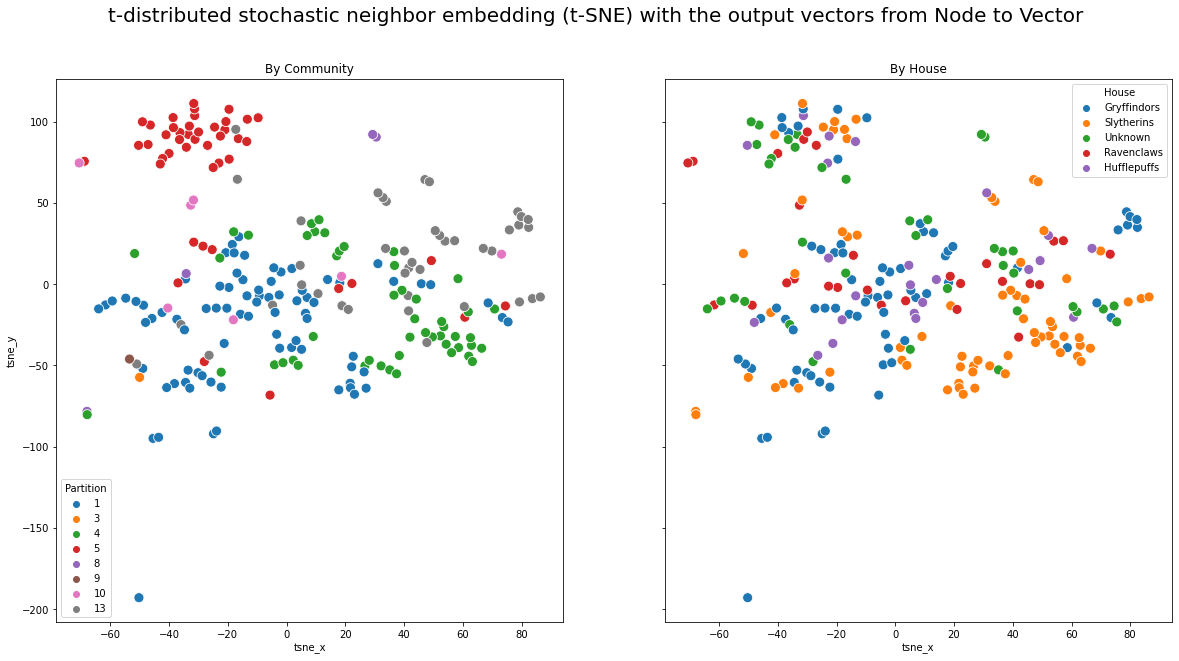

In [38]:
#Step 4: Louvain communities 
import matplotlib.pyplot as plt
import seaborn as sns



# Creation of the communtities (Same random state as in the Project 2)
G_weight_ind= G_weight.to_undirected()

partition = community_louvain.best_partition(G_weight_ind,weight='weight',random_state=42)

with open(r"pickle_network_final.txt", "rb") as fp:   # Unpickling
    df = pickle.load(fp)
    
    
# Adding the chacacters' vector, house and partition in one Dataframe

vector_id=[]
house_id=[]
partition_id=[]
for name in top_x_names_by_all_degree(top=230):
    vector_id.append(n2v_model.wv[name] )
    house_id.append(df.loc[df['Name']==name].House.values[0])
    partition_id.append(partition[name]+1)
    
codes_house,uniques_house=pd.factorize(house_id)
codes_partition,uniques_partition=pd.factorize(partition_id)

from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0,perplexity=3, n_iter=10000)
tsne_data = model.fit_transform(vector_id)
list_of_tsne=[tsne_data[i,:] for i in range(len(tsne_data))]
df_1 = pd.DataFrame(list(zip(top_x_names_by_all_degree(top=230), list_of_tsne)),
               columns =['Name', 'tsne'])
df_2 = pd.DataFrame(list(zip(top_x_names_by_all_degree(top=230), house_id)),
               columns =['Name', 'House'])
df_3 = pd.DataFrame(list(zip(top_x_names_by_all_degree(top=230), partition_id)),
               columns =['Name', 'Partition'])

df_merge=df_1.merge(df_2,on='Name').merge(df_3,on='Name')
df_merge['tsne_x'],df_merge['tsne_y']=pd.DataFrame(zip(*df_merge.tsne)).T[0],pd.DataFrame(zip(*df_merge.tsne)).T[1]


# Printing
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
fig.suptitle('t-distributed stochastic neighbor embedding (t-SNE) with the output vectors from Node to Vector',fontsize=20)
sns.scatterplot(ax=axes[0],data=df_merge, x="tsne_x", y="tsne_y",hue='Partition',palette=sns.color_palette("tab10",len(df_merge['Partition'].unique())),s=100)
axes[0].set_title('By Community')

sns.scatterplot(ax=axes[1],data=df_merge, x="tsne_x", y="tsne_y",hue='House',palette=sns.color_palette("tab10",5),s=100)
axes[1].set_title('By House')

#plt.savefig('louvain_communities.png')


At first glance, the t-SNE algorithm comes with a better differentiation between the Community than the House. This confirms the modularity higher found by the Louvain Algorithm for the partition rather than the house. \

* On the left figure, the group composed mostly by the community 5, seems to be quite distinct from the rest of the nodes: Those consist of characters from the Harry Potter video game. Therefore, it makes sense to have this group set aside. However, if we look at the same points from the House perspective, they do not look like an homogenous group.
* The community 4, represented in Green on the figure on the left, is a fairly large community, and it consists mainly of characters from the Slytherin house. We can definitely agree on that by looking at the same points bu with the house labels.

To sum up, the Louvain algorithm proved that is can pick up communities in a better way than just looking at the house and this can be shown by plotting each of the node (represented by a vector created by the Node to Vector Algorithm), 

### 3.5 Project 5: Emotion <a class="anchor" id="s3_5"></a>

#### 3.5.1 Motivation

The emotion behind a character is defined by more than just positive or negative sentiment. To get complex emotion such as happiness, hate or worry, we need to train a model to recognize those sentiments on a training set and apply it to the Harry Potter's movie scripts. **This technique is called transfer learning.**

#### 3.5.2 Tool

**a) Train a model on a training set**

For the analysis of the emotion of the characters, we will use a database composed of tweets that have been classified into 13 emotions (Main emotion of the tweet). Link: https://www.kaggle.com/icw123/emotion \
* Step 1: Creation of the functions that will clean the data.
* Step 2: Loading the database of the tweets.
* Step 3: Reduction of the number of emotions from 13 to 11 (anger and boredom) due to lack of examples to train the model.
* Step 4: Converting each emotion to an integer
* Step 5: Preprocess the tweet to remove useless part of the string. 
* Step 6: Filtering data to only use tweets with more than two words after processing
* Step 7: Convert words into vectors of numbers to allow use within models by using TfidfVectorizer with unigrams and bigrams. 
* Step 8: Resample the data so that each emotion has an equal number of tweets. 
* Step 9: Train our favorite ML algorithm on the tweets

**b) Apply the model on a HP scripts**
* Step 10: Preprocess the Harry Potter's scripts
* Step 11: Apply our favorite ML algorithm on Harry Potter's scripts
* Step 12: Converting each emotion integer into emotion string
* Step 13: Addition of columns of futur plotting

#### 3.5.3 Apply the tool

##### **a) Train a model on a training set**

**Step 1:** Loading the packages and creation of the functions that will clean the data.

In [39]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words = [PorterStemmer().stem(w) for w in filtered_words]
    lemma_words=[WordNetLemmatizer().lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

**Step 2:** Loading the packages and creation of the functions that will clean the data.

In [40]:
emotions = pd.read_csv('text_emotion.csv')
emotions = emotions.drop(columns = ['tweet_id', 'author'])
emotions.groupby('sentiment').count()

content
sentiment          
anger           110
boredom         179
empty           827
enthusiasm      759
fun            1776
happiness      5209
hate           1323
love           3842
neutral        8638
relief         1526
sadness        5165
surprise       2187
worry          8459

**Step 3:** Reduction of the number of emotions from 13 to 11 (anger and boredom) due to lack of examples to train the model.

In [41]:
# due to the very small number of anger and boredom tweets in comparison to the other emotions, I will remove these tweets

emotions = emotions[emotions.sentiment.isin({'empty', 'enthusiasm', 'fun', 'happiness', 'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise', 'worry'})]

**Step 4:** Converting each emotion to an integer


In [42]:
# converting each emotion to an integer
sentiment_dict={'empty':0, 'enthusiasm':1, 'fun':2, 'happiness':3, 'hate':4, 'love':5, 'neutral':6, 'relief':7, 'sadness':8, 'surprise':9, 'worry':10}
emotions['sentiment'] = emotions['sentiment'].map(sentiment_dict)
emotions.head()

sentiment                                            content
0          0  @tiffanylue i know  i was listenin to bad habi...
1          8  Layin n bed with a headache  ughhhh...waitin o...
2          8                Funeral ceremony...gloomy friday...
3          1               wants to hang out with friends SOON!
4          6  @dannycastillo We want to trade with someone w...

**Step 5:** Preprocess the tweet to remove useless part of the string. 

In [43]:
emotions['cleanText']=emotions['content'].map(lambda x:preprocess(x))
emotions['content'] = emotions['content'].astype(str)
emotions['cleanText'] = emotions['cleanText'].astype(str)

**Step 6:** Filtering data to only use tweets with more than two words after processing

In [44]:
# filtering data to only use tweets with more than two words after processing
emotions['clean_wordcount'] = emotions['cleanText'].map(lambda x:len(re.findall(r'\w+', x)))
emotions = emotions[emotions['clean_wordcount'] > 2]
emotions

sentiment                                            content  \
0              0  @tiffanylue i know  i was listenin to bad habi...   
1              8  Layin n bed with a headache  ughhhh...waitin o...   
2              8                Funeral ceremony...gloomy friday...   
3              1               wants to hang out with friends SOON!   
4              6  @dannycastillo We want to trade with someone w...   
...          ...                                                ...   
39994          3                      Succesfully following Tayla!!   
39996          5                     Happy Mothers Day  All my love   
39997          5  Happy Mother's Day to all the mommies out ther...   
39998          3  @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...   
39999          5  @mopedronin bullet train from tokyo    the gf ...   

                                               cleanText  clean_wordcount  
0      tiffanylue know listenin bad habit earlier sta...                9  
1                  layin bed headache ughhhh waitin call                6  
2                         funeral ceremony gloomy friday                4  
3                                wants hang friends soon                4  
4      dannycastillo want trade someone houston ticke...                7  
...                                                  ...              ...  
39994                        succesfully following tayla                3  
39996                             happy mothers day love                4  
39997  happy mother day mommies woman man long momma ...               10  
39998  niariley wassup beautiful follow peep new hit ...               15  
39999  mopedronin bullet train tokyo visiting japan s...               12  

[36261 rows x 4 columns]

**Step 7:** Convert words into vectors of numbers to allow use within models by using TfidfVectorizer with unigrams and bigrams. 


In [45]:
x_train = emotions['cleanText']
y_train = emotions['sentiment']

# this converts the words into vectors of numbers to allow use within models
from sklearn.feature_extraction.text import TfidfVectorizer
tokenizer = RegexpTokenizer(r'\w+')
vectorizer = TfidfVectorizer(ngram_range=(1, 2), tokenizer=tokenizer.tokenize)
full_text = list(x_train.values)
vectorizer.fit(full_text)

x_vectorized = vectorizer.transform(x_train)

C:\Users\marcm\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



**Step 8:** Resample the data so that each emotion has an equal number of tweets.

As the data is very imbalanced (759 enthusiasm tweets vs 8638 neutral) this can negatively affect the training of the model. Therefore I will use SMOTE to resample the data so that each emotion has an equal number of tweets. Regular resampling can result in overfitting, as the model will be trained on identical rows of data many times, whereas SMOTE involves the creation of new, synthetic data which is based on the existing data, so it will be similar but not identical. This helps to avoid overfitting.

In [46]:
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x_vectorized, y_train)

**Step 9:** Train our favorite ML algorithm on the tweets

In [47]:
#Test size: 10% of the dataset
train_vectorized, test_vectorized, y_train, y_valid = train_test_split(x_smote, y_smote, test_size=0.1)

In [48]:
logreg2 = LogisticRegression(multi_class ='multinomial',solver='saga',class_weight='balanced')
logreg2.fit(train_vectorized, y_train)
logreg2.score(test_vectorized, y_valid)

0.7855075818960527

##### **b) Apply the model on a HP scripts**

**Step 10:** Preprocess the Harry Potter's scripts

In [49]:
list_of_dataframes=[]
for i in range(1,9):
    list_of_dataframes.append(pd.read_csv('hp-dataset_script\hp{}.csv'.format(i)))
df_HP = pd.concat(list_of_dataframes)

df_HP['cleanText']=df_HP['dialog'].map(lambda x:preprocess(x))

df_HP['clean_wordcount'] = df_HP['cleanText'].map(lambda x:len(re.findall(r'\w+', x)))
filtered_df_HP = df_HP[df_HP['clean_wordcount'] > 2]
HP_vectorized = vectorizer.transform(filtered_df_HP['cleanText'])

**Step 11:** Apply our favorite ML algorithm on Harry Potter's scripts

In [50]:
filtered_df_HP['prediction']=logreg2.predict(HP_vectorized)

<ipython-input-50-323efb5bb594>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Step 12:** Converting each emotion integer into emotion string

In [51]:
reversed_sentiment_dict = {v: k for k, v in sentiment_dict.items()}

filtered_df_HP['emotion']=filtered_df_HP['prediction'].map(reversed_sentiment_dict)  
# filtered_df_HP.drop('sentiment',inplace=True,axis=1)
filtered_df_HP.head()

<ipython-input-51-aecf73b032ed>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



movie            chapter  \
0  Harry Potter and the Philosopher's Stone  Doorstep Delivery   
1  Harry Potter and the Philosopher's Stone  Doorstep Delivery   
2  Harry Potter and the Philosopher's Stone  Doorstep Delivery   
5  Harry Potter and the Philosopher's Stone  Doorstep Delivery   
6  Harry Potter and the Philosopher's Stone  Doorstep Delivery   

            character                                             dialog  \
0    Albus Dumbledore  I should have known that you would be here...P...   
1  Minerva McGonagall  Good evening, Professor Dumbledore. Are the ru...   
2    Albus Dumbledore   I'm afraid so, Professor. The good, and the bad.   
5  Minerva McGonagall  Do you think it wise to trust Hagrid with some...   
6    Albus Dumbledore  Ah, Professor, I would trust Hagrid with my life.   

                                           cleanText  clean_wordcount  \
0                   known would professor mcgonagall                4   
1  good evening professor dumbledore rumours true...                7   
2                          afraid professor good bad                4   
5        think wise trust hagrid something important                6   
6                  professor would trust hagrid life                5   

   prediction    emotion  
0           6    neutral  
1           3  happiness  
2          10      worry  
5          10      worry  
6          10      worry

**Step 13:** Addition of columns of futur plotting

In [52]:
# Addition the order of the scene
initial_chap ='Doorstep Delivery'
i=1
counter=[]
for index,row in filtered_df_HP[['movie','chapter']].iterrows():
    if row['chapter']!=initial_chap:
        i+=1
        initial_chap=row['chapter']
    counter.append(i)
filtered_df_HP['scene_counting']=counter

<ipython-input-52-e2dbe4b17ebf>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##### c) Plotting the different outputs

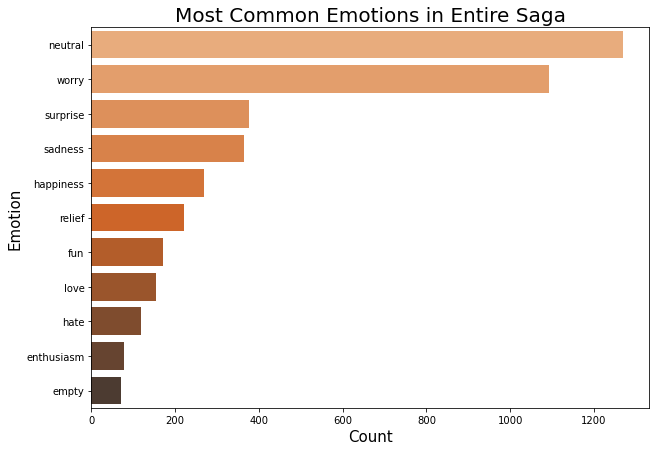

In [64]:
total_emotions = pd.DataFrame(filtered_df_HP.groupby('emotion', as_index=False).chapter.count())
total_emotions = total_emotions.sort_values('chapter', ascending=False)
plt.figure(figsize=(10,7))
sns.barplot(y='emotion', x='chapter', data=total_emotions, palette="Oranges_d", orient='h')
plt.title('Most Common Emotions in Entire Saga', fontsize=20)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Emotion', fontsize=15)
plt.show()
#plt.savefig('most_common_emotions_saga.png')

In [54]:
total_emotions = pd.DataFrame(filtered_df_HP.groupby(['movie','chapter','scene_counting','emotion']).prediction.count()).reset_index()
total_emotions.sort_values(by='scene_counting',inplace=True)

#total_emotions.to_csv('total_emotions_HP.csv')

In [55]:
total_emotions=pd.read_csv('total_emotions_HP.csv')

In [56]:
df_emotion_grouped = total_emotions.groupby('chapter')['prediction'].sum().reset_index()
df_emotion_grouped.columns = ['chapter','pred_chapter_sum']
df_emotions = pd.merge(total_emotions, df_emotion_grouped, on='chapter', how='outer')
df_emotions['prediction_percentage'] = df_emotions['prediction']/df_emotions['pred_chapter_sum']
df_emotions.sort_values(by='scene_counting',inplace=True)
df_emotions.head()

movie            chapter  \
0  Harry Potter and the Philosopher's Stone  Doorstep Delivery   
1  Harry Potter and the Philosopher's Stone  Doorstep Delivery   
2  Harry Potter and the Philosopher's Stone  Doorstep Delivery   
3  Harry Potter and the Philosopher's Stone  Doorstep Delivery   
4  Harry Potter and the Philosopher's Stone  Doorstep Delivery   

   scene_counting   emotion  prediction  pred_chapter_sum  \
0               1   neutral           3                13   
1               1   sadness           1                13   
2               1     worry           5                13   
3               1  surprise           2                13   
4               1      love           1                13   

   prediction_percentage  
0               0.230769  
1               0.076923  
2               0.384615  
3               0.153846  
4               0.076923

In [57]:
df_emotions['prediction_percentage_window'] = df_emotions['prediction_percentage'].rolling(window=2).mean()
df_emotions.head()

movie            chapter  \
0  Harry Potter and the Philosopher's Stone  Doorstep Delivery   
1  Harry Potter and the Philosopher's Stone  Doorstep Delivery   
2  Harry Potter and the Philosopher's Stone  Doorstep Delivery   
3  Harry Potter and the Philosopher's Stone  Doorstep Delivery   
4  Harry Potter and the Philosopher's Stone  Doorstep Delivery   

   scene_counting   emotion  prediction  pred_chapter_sum  \
0               1   neutral           3                13   
1               1   sadness           1                13   
2               1     worry           5                13   
3               1  surprise           2                13   
4               1      love           1                13   

   prediction_percentage  prediction_percentage_window  
0               0.230769                           NaN  
1               0.076923                      0.153846  
2               0.384615                      0.230769  
3               0.153846                      0.269231  
4               0.076923                      0.115385

In [58]:
emotion_list = df_emotions['emotion'].unique()
to_concatenate = []
for emotion in emotion_list:
    s_df = df_emotions[df_emotions['emotion']==emotion]
    s_df2 = s_df.copy()
    s_df2 = s_df2.sort_values(by='scene_counting',inplace=False,axis=0)
    pred_smooth_list = s_df2['prediction_percentage'].rolling(window=2).mean().values
    pred_smooth_list[0] = s_df2['prediction_percentage'].values[0]
    s_df2['pred_smooth'] = pred_smooth_list
    to_concatenate.append(s_df2)
df_emotions_smooth = pd.concat(to_concatenate)
df_emotions_smooth.sort_values(by='scene_counting',inplace=True,axis=0)
df_emotions_smooth.head()

movie            chapter  \
0  Harry Potter and the Philosopher's Stone  Doorstep Delivery   
5  Harry Potter and the Philosopher's Stone  Doorstep Delivery   
4  Harry Potter and the Philosopher's Stone  Doorstep Delivery   
3  Harry Potter and the Philosopher's Stone  Doorstep Delivery   
2  Harry Potter and the Philosopher's Stone  Doorstep Delivery   

   scene_counting    emotion  prediction  pred_chapter_sum  \
0               1    neutral           3                13   
5               1  happiness           1                13   
4               1       love           1                13   
3               1   surprise           2                13   
2               1      worry           5                13   

   prediction_percentage  prediction_percentage_window  pred_smooth  
0               0.230769                           NaN     0.230769  
5               0.076923                      0.076923     0.076923  
4               0.076923                      0.115385     0.076923  
3               0.153846                      0.269231     0.153846  
2               0.384615                      0.230769     0.384615

In [59]:
df_order_movies=df_emotions_smooth.groupby('movie').max('scene_counting').scene_counting.reset_index().sort_values(by='scene_counting')
df_order_movies

movie  scene_counting
6     Harry Potter and the Philosopher's Stone              34
0      Harry Potter and the Chamber of Secrets              74
7     Harry Potter and the Prisoner of Azkaban             106
3          Harry Potter and the Gobelt of Fire             134
5    Harry Potter and the Order of the Phoenix             161
4       Harry Potter and the Half-Blood Prince             187
1  Harry Potter and the Deathly Hallows Part 1             212
2  Harry Potter and the Deathly Hallows Part 2             238

In [60]:
l = df_order_movies['scene_counting'].values
l_x0 = np.concatenate(([1],l[:-1]))
l_x1 = l
print(l_x0)
print(l_x1)


[  1  34  74 106 134 161 187 212]
[ 34  74 106 134 161 187 212 238]


In [61]:
fig = px.line(df_emotions_smooth, x="scene_counting", y="pred_smooth", color='emotion')
list_colors = ['#9FE3FE','#DF9BFD','#FD9DCB','#FFB3A6','#FECF9F','#F7FCA8','#D3FFA5','#B2FEDB']
l = df_order_movies['scene_counting'].values
l = np.concatenate(([0],l[:-1]))
for scene in range(len(df_order_movies)):
    fig.add_vrect(x0=l_x0[scene],x1=l_x1[scene],annotation_text='HP{}'.format(scene+1),annotation=dict(font_size=14),
              fillcolor=list_colors[scene], opacity=0.2, line_width=1.5,annotation_position="top", line_color = 'gray')


#### 3.5.4 Discuss the outcome

In [65]:
fig = go.Figure()

c=0
l_emotion = ['legendonly',True,'legendonly','legendonly','legendonly',
             True,'legendonly','legendonly','legendonly','legendonly','legendonly',]
for emotion in df_emotions_smooth['emotion'].unique():
    fig.add_trace(
    go.Line(x = df_emotions_smooth[df_emotions_smooth['emotion']==emotion]['scene_counting'],
            y = df_emotions_smooth[df_emotions_smooth['emotion']==emotion]['pred_smooth'],
            name = emotion,visible=l_emotion[c]))
    c+=1

list_colors = ['#9FE3FE','#DF9BFD','#FD9DCB','#FFB3A6','#FECF9F','#F7FCA8','#D3FFA5','#B2FEDB']
l = df_order_movies['scene_counting'].values
l = np.concatenate(([0],l[:-1]))
for scene in range(len(df_order_movies)):
    fig.add_vrect(x0=l_x0[scene],x1=l_x1[scene],annotation_text='HP{}'.format(scene+1),annotation=dict(font_size=14),
              fillcolor=list_colors[scene], opacity=0.2, line_width=1.5,annotation_position="top", line_color = 'gray')
    
fig.show()
#py.plot(fig, filename='emotion_films_Harry_Potter_overview')

C:\Users\marcm\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




'https://plotly.com/~mmestre/96/'

The plot above shows the impact of each emotion or feeling in each scene of the entire Harry Potter saga. The weight of the feelings of each scene has been calculated by considering the following emotions: happiness, love, surprise, fun, enthusiasm and relief are all rather good emotions, whereas worry, sadness and hate are bad. Finally we have neutral, and empty groups all the rest of emotions that the obtained from the models. 

Below we take a closer look at the analysis of the results of this fantastic tool we have developed to study the unfolding of sentiment in films.

> **Happiness**
> * When looking at the impact happiness has in the movies we can clearly see 3 spikes. The first two we see make a lot of sense since they are located towards the ending of movies 1 and 2, which are well known for having very happy endings in comparison with the rest of the saga. 
> * Another spike can be seen in Harry Potter and the Deathly Hallows part 1, in the moment when Hermione and Harry discover that they can use Gryffindor sword, which was left for Harry by Dumbledore, to destroy horrocruxes. 
> * Just by looking at the plot it can be seen that happiness is in decline as the saga progresses, and in fact it is widely acknowledged by fans that the films get darker and darker, going from a compilation of children's films to a totally adult mood.

> **Sadness**
> * The most highlighted moment of sadness throughout all of the movies can be seen towards the end of the last movie, when Harry Potter dies (coming back to life afterwards) and Hogwarts is partially destroyed when fighting against de dark lord Voldemort.
> * A very relevant part considering sadness can be noted at the end of Harry Potter and the Order of the Phoenix, when Bellatrix Lestrange strikes Sirius Black with the killing curse and kills him in fron of Harry. A very sad moment.
> * It can also be seen at the beginning of the chamber of secrets a spike, related with the visit Dobby pays Harry to warn him about going to Hogwarts. 

> **Love**
> * As expected, we can see love highlights in the beginning and ending of the first and second movies, and in the end of the saga when Harry kills Voldemort, Hogwarts is saved and there is a fast-forward where we can see Harry and Giny Weasley married and with a son.
> * Highest spikes in love are shown in movies 4 and 7. When looking into the Goblet of Fire, those scenes are related with the Quidditch world cup, where there is a lot of fun and party and all the Weasleys, Hermione and Harry are together. In the Deathly Hallows part 1, in the beginning of the movie, the Dursleys leave Privet Drive and leave Harry, and Hermione uses "obliviate" on her parents to erase their memories to make them think they did not have a daughter. Both are very loving emotive moments.

>  **Hate**
> * In regards to hate, there is a very remarkable scene in the Chamber of Secrets. Harry wanders through the corridors of Hogwarts following the sounds and whispers of the Basilisc. Then he encounters MrNorris, Argus Filch's cat, petrified and hung on a lamp next to a message written on a wall. Filch is absolutely furious about this and thinks Harry did that to his cat. Also Hermione claims that the message on the wall is written in blood. There is a lot of hate in this scene overall, mainly driven by Argus Filch's thoughts towards harry for killing his cat. Amazing insight!

> **Fun**
> * According to the results, the most fun scene happens in the end of Harry Potter and the Prisoner of Azkaban. Harry and Hermione save Sirius Black and Buckbeak, and afterwards go back to the hospital wing to visit Ron. He is already awake and asks how he and Hermione got outside the wing, when they were right in front of him (time travelling).

> **Worry**
> * This emotion is quite stable or monotonous throughout the films. It can be said that due to the very nature of the style of the films, the plot and the events, a very " worrying " result was to be expected in general. In addition, when compared to other feelings such as happiness or sadness, the weight or percentage impact on the overall feeling of each scene is much higher on average for worry.

> **Relief**
> * At the beginning of the Chamber of Secrets, Harry goes to Diagon Alley using the Floo Powder mixup but he mispronounces "Diagon Alley" as "diagonally" out of a panic thanks to watching the effect of the Floo Powder as a demonstration. He then appears in a rather "dark" part of the Diagon Alley, but then he finds his way back and the overall relief feeling makes sense!
> * Towards the end of Harry Potter and the Prisoner of Azkaban, Harry and Hermione save Sirius Black and Buckbeak after travelling back in time. The final part is quite a relief as their efforts to save the situation are fulfilled.

> **Neutral**
> * Although it is very exciting to talk about powerful feelings like happiness, sadness, hate... Harry Potter is characterised by one feeling above all others, the neutral one. As boring as that may sound, most of the sentences are characterised by that feeling as they are neither extremely happy nor sad. Moreover, since it is all dialogue, most of the words used are neutral in character. Therefore, it makes perfect sense to have obtained these results in the plot. 
> * However, it is worth noting that the feelings of worry and neutral both have a similar impact in each scene. This helps determine the general nature of the Harry Potter saga.

> Overall, neutral and worry are the two most common emotions in the movie, whereas hate and enthusiasm are the least common. These were also two of the least common emotions in the training set so these results may not be accurate and may be a result of the dataset being imbalanced, despite having used SMOTE.

## 4. Discussion <a class="anchor" id="c4"></a>

## 5. Contributions <a class="anchor" id="c5"></a>

During this project...

* Jakob (s184419) has focused on ...  

* Marc (s210152) has focused on ...

* Paul (s205569) has focused on ...

However, it is worth noting the great collaboration throughout the course, both in the assignments and in the final project, so that each of us has been aware of and contributed to the project...

## 6. References <a class="anchor" id="c6"></a>

* The main ...